<a href="https://colab.research.google.com/github/VMarques98/Satisfaction/blob/main/RoyalCarribeanTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

---


- Question 1:
Report the total number of sales orders processed last month. (The month before current). Today’s date is 2020-01-23.

    
      WITH filtered_dim_date AS (
      SELECT date_key
      FROM dim_date
      WHERE year = 2019 AND month_of_year = 12
      )

      SELECT COUNT(fact_sales_order.sales_order_number) AS total_sales_orders
      FROM fact_sales_order
      JOIN filtered_dim_date 
      ON fact_sales_order.date_key = filtered_dim_date.date_key;

---
- Question 2:
Rank my store sales (sale_subtotal) based on sales that occured last month. (The month before
current). Today’s date is 2020-01-23.
Please report the store name and city the store is located in your query.

      WITH sales_data AS (
        SELECT
            fact_sales_order.store_key,
            SUM(fact_sales_order.sale_subtotal) AS total_sales
        FROM
            fact_sales_order
        JOIN
            dim_date ON fact_sales_order.date_key = dim_date.date_key
        WHERE
            dim_date.year = 2019 AND dim_date.month_of_year = 12
        GROUP BY
            fact_sales_order.store_key
      )

      SELECT
          dim_store.store_name,
          dim_store.city,
          sales_data.total_sales,
          RANK() OVER (ORDER BY sales_data.total_sales DESC) AS store_rank
      FROM
          sales_data
      JOIN
          dim_store ON sales_data.store_key = dim_store.store_key
      ORDER BY
          store_rank;


---
- Question 3:
Since the beginning of this year, which employee has the most unique sales?

      WITH sales_data AS (
          SELECT
              fact_sales_order.employee_key,
              COUNT(DISTINCT fact_sales_order.sales_order_number) AS unique_sales
          FROM
              fact_sales_order
          JOIN
              dim_date ON fact_sales_order.date_key = dim_date.date_key
          WHERE
              dim_date.year = 2020 AND dim_date.month_of_year = 1
          GROUP BY
              fact_sales_order.employee_key
      )

      SELECT
          dim_employee.employee_name,
          sales_data.unique_sales
      FROM
          sales_data
      JOIN
          dim_employee ON sales_data.employee_key = dim_employee.employee_key
      ORDER BY
          sales_data.unique_sales DESC
      LIMIT 1;


---



# Part 2

---


For an exploratory data analysis initial step to take is data cleaning. The first thing is to load the Excel sheet into the data frame. Afterwards, you will take the values created and, in place (this is important to save data when doing operations on large datasets), remove all empty string/null values from the dataset. This is done to handle missing values. To do this, we find all nulls in the data frame. Next, we replace all nulls with the mean. Statistically, this doesn't change much as we are using the average of the column (if they're numeric). Afterwards, we check to see if there are no missing values left in the data frame.

In [ ]:
#Royal Carribean Test By Victor Marques 05/20/23
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#ignore all warnings
warnings.filterwarnings("ignore")

# Load the DataFrame from an Excel file
df = pd.read_excel('satisfaction.xlsx')
#make two copies one to use and another for record keeping
df_original = df.copy()

In [ ]:
# Calculate total number of rows
total_rows = df.shape[0]

#function to find % of rows with missing values > 1
def nummissing(df):
  # Calculate number of rows with at least one missing value
  missing_rows = df.isnull().any(axis=1).sum()

  # Calculate percentage of rows with missing values
  percentage_missing = (missing_rows / total_rows) * 100

  print('\nPercentage of rows with at least one missing value: {}%'.format(percentage_missing))

# Check for missing values in the DataFrame
print('\n',df.isnull().sum())

#Call to find nummissing
nummissing(df)

# Filling missing values with mean of the column
for column in df.columns:
    if df[column].dtype != np.object:  # filling missing values is meaningful only for numeric columns
        df[column] = df[column].fillna(df[column].mean())
print("\nFilled in missing values with mean of the column\n")

# Check if there still exist any missing values
print('\n',df.isnull().sum())

#call to find nummissing after filling in the values.
nummissing(df)



 id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64



Next, I check for duplicates that exist within the data frame. To do this, I first create a script that checks for duplicate rows inside of the data frame and displays the number. Afterwards, I drop the duplicated rows.

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

print("Number of duplicate rows: ", duplicate_rows.sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)


Number of duplicate rows:  0


Next, we drop the ID column, as it's unnecessary at this moment to keep the value for data analysis.

In [ ]:
# Make a copy for later on usage
df2=df
# Drop the id column
df = df.drop(columns=['id'])
df_original = df_original.drop(columns=['id'])

The next objective in the data cleaning process is to convert all categorical data types to an appropriate numerical format. For example, represent "Male" and "Female" as [0, 1] and the class of passenger (Economy, Economy Plus, Business) as [0, 1, 2].

In [ ]:
# Check the data types after conversion
print("\nData types before conversion:")
print(df.dtypes)

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over each column
for column in df.columns:
    # Try to convert to numeric values
    df[column] = pd.to_numeric(df[column], errors='ignore')
    
    # If column is still object type, convert categorical string data to numerical codes
    if df[column].dtype == 'object':
        le.fit(df[column])
        df[column] = le.transform(df[column])

# For each column in the DataFrame, print unique values before and after the conversion
for column in df.columns:
    if df[column].dtype != df_original[column].dtype:
        print(f"\nColumn: {column}")
        print("Conversion values:")
        
        mapping = dict(zip(range(len(df_original[column].unique())), sorted(df_original[column].unique())))
        
        for converted_value in sorted(df[column].unique()):
            print(f"'{mapping[converted_value]}' is now '{converted_value}'")

# Check the data types after conversion
print("\nData types after conversion:")
print(df.dtypes)
print(df.head())



Data types before conversion:
satisfaction_v2                       object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minut

Now that everything has been converted from categorical to numerical information, the next step is to scale the data. To do this, we will fit a scaler to the data and transform it.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Print the first few rows of the scaled data
print(df_scaled.head())


   satisfaction_v2    Gender  Customer Type       Age  Type of Travel  \
0         1.140918  1.014878       2.112281  1.096085        1.493951   
1         1.140918  1.014878       2.112281  0.633101        1.493951   
2         1.140918  1.014878       2.112281  1.029945        1.493951   
3         1.140918 -0.985340       2.112281 -0.226727        1.493951   
4         1.140918  1.014878       2.112281  1.029945        1.493951   

      Class  Flight Distance  Inflight wifi service  \
0  0.653608        -0.823417              -2.052677   
1  0.653608         1.298998              -2.052677   
2  0.653608         0.258343              -2.052677   
3  0.653608         0.311478              -2.052677   
4  0.653608        -0.614885              -2.052677   

   Departure/Arrival time convenient  Ease of Online booking  ...  \
0                          -0.692719               -1.966761  ...   
1                          -0.692719               -1.253359  ...   
2                      

Lastly, to finish the data cleaning process, we must identify and remove significant anomalies in the data.

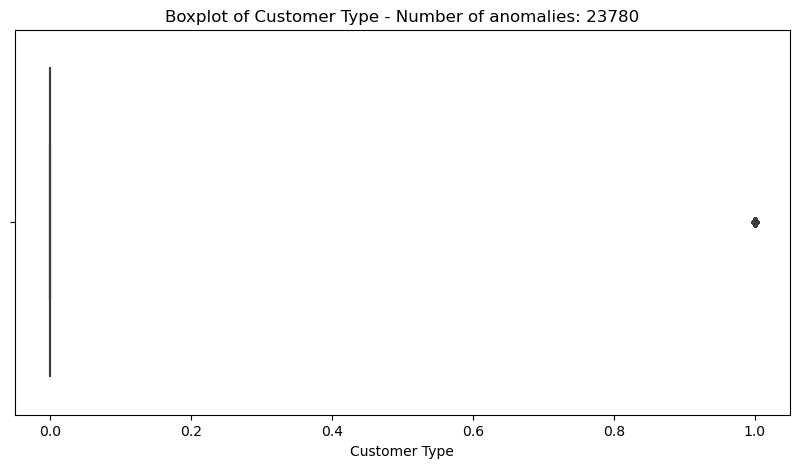

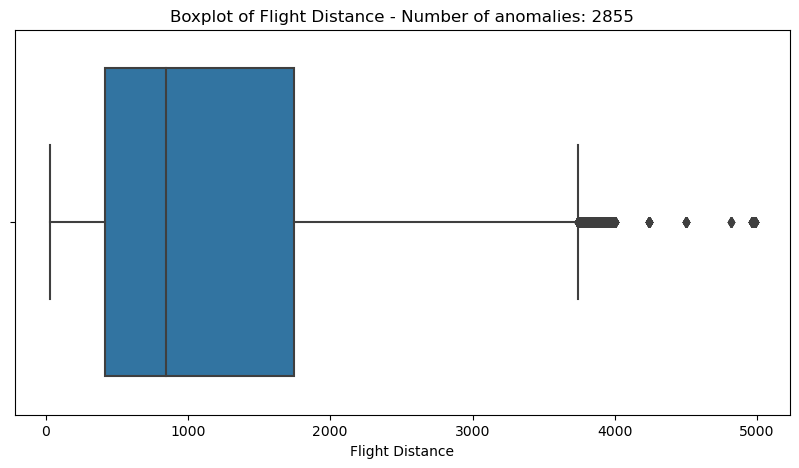

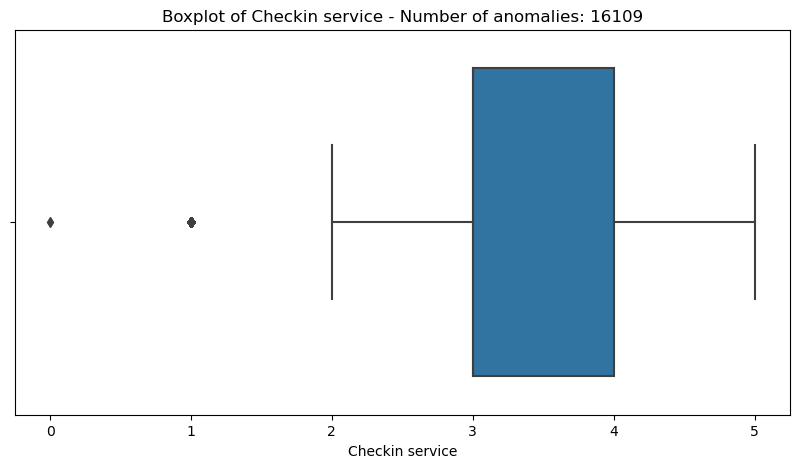

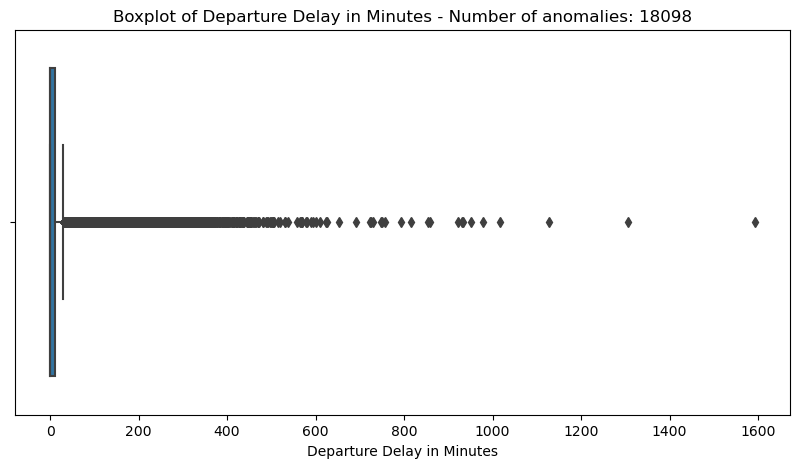

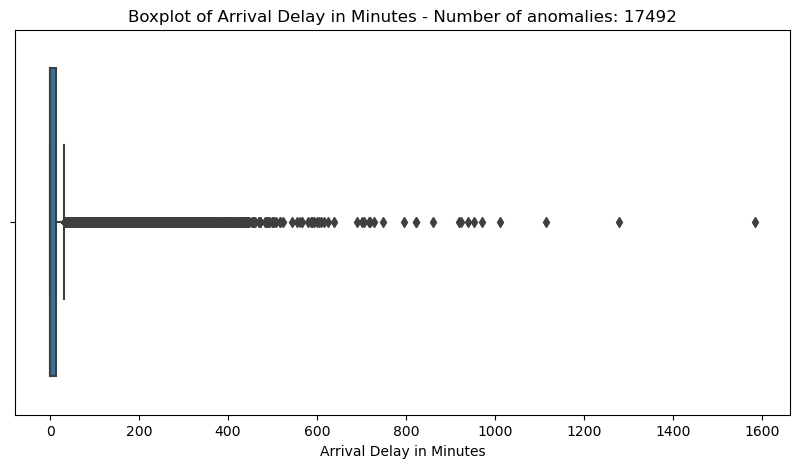

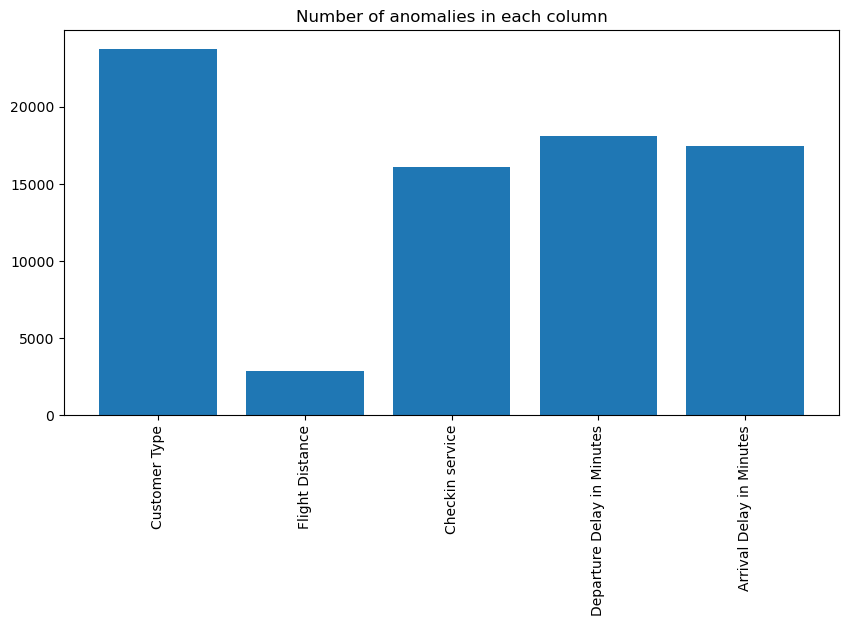

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Initialize a dictionary to store the count of anomalies for each column
anomalies_dict = {}

# Iterate over numeric columns only
for column in df.select_dtypes(include=[np.number]).columns:
    # Calculate Q1, Q3 and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define criteria for a value to be considered an outlier
    outlier_condition = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
    
    # Calculate the number of outliers and add it to the dictionary
    anomalies_dict[column] = df[outlier_condition].shape[0]

    # If anomalies count is greater than zero, draw a boxplot
    if anomalies_dict[column] > 0:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[column])
        plt.title(f"Boxplot of {column} - Number of anomalies: {anomalies_dict[column]}")
        plt.show()

# Filter the dictionary to only include columns with anomalies > 0
anomalies_dict = {column: count for column, count in anomalies_dict.items() if count > 0}

# If there are columns with anomalies, create a bar chart to show the number of anomalies in each column
if anomalies_dict:
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(anomalies_dict)), list(anomalies_dict.values()), align='center')
    plt.xticks(range(len(anomalies_dict)), list(anomalies_dict.keys()), rotation=90)
    plt.title("Number of anomalies in each column")
    plt.show()
else:
    print("No columns with anomalies found.")


There are a large number of anomalies in the categories of Customer Types, Flight Distance, Check-in Service, Departure and Arrival delays in minutes. Now, we must investigate these categories more in-depth to find out why. To do this, we will use an isolation forest.

 1    123386
-1      6494
Name: anomaly, dtype: int64


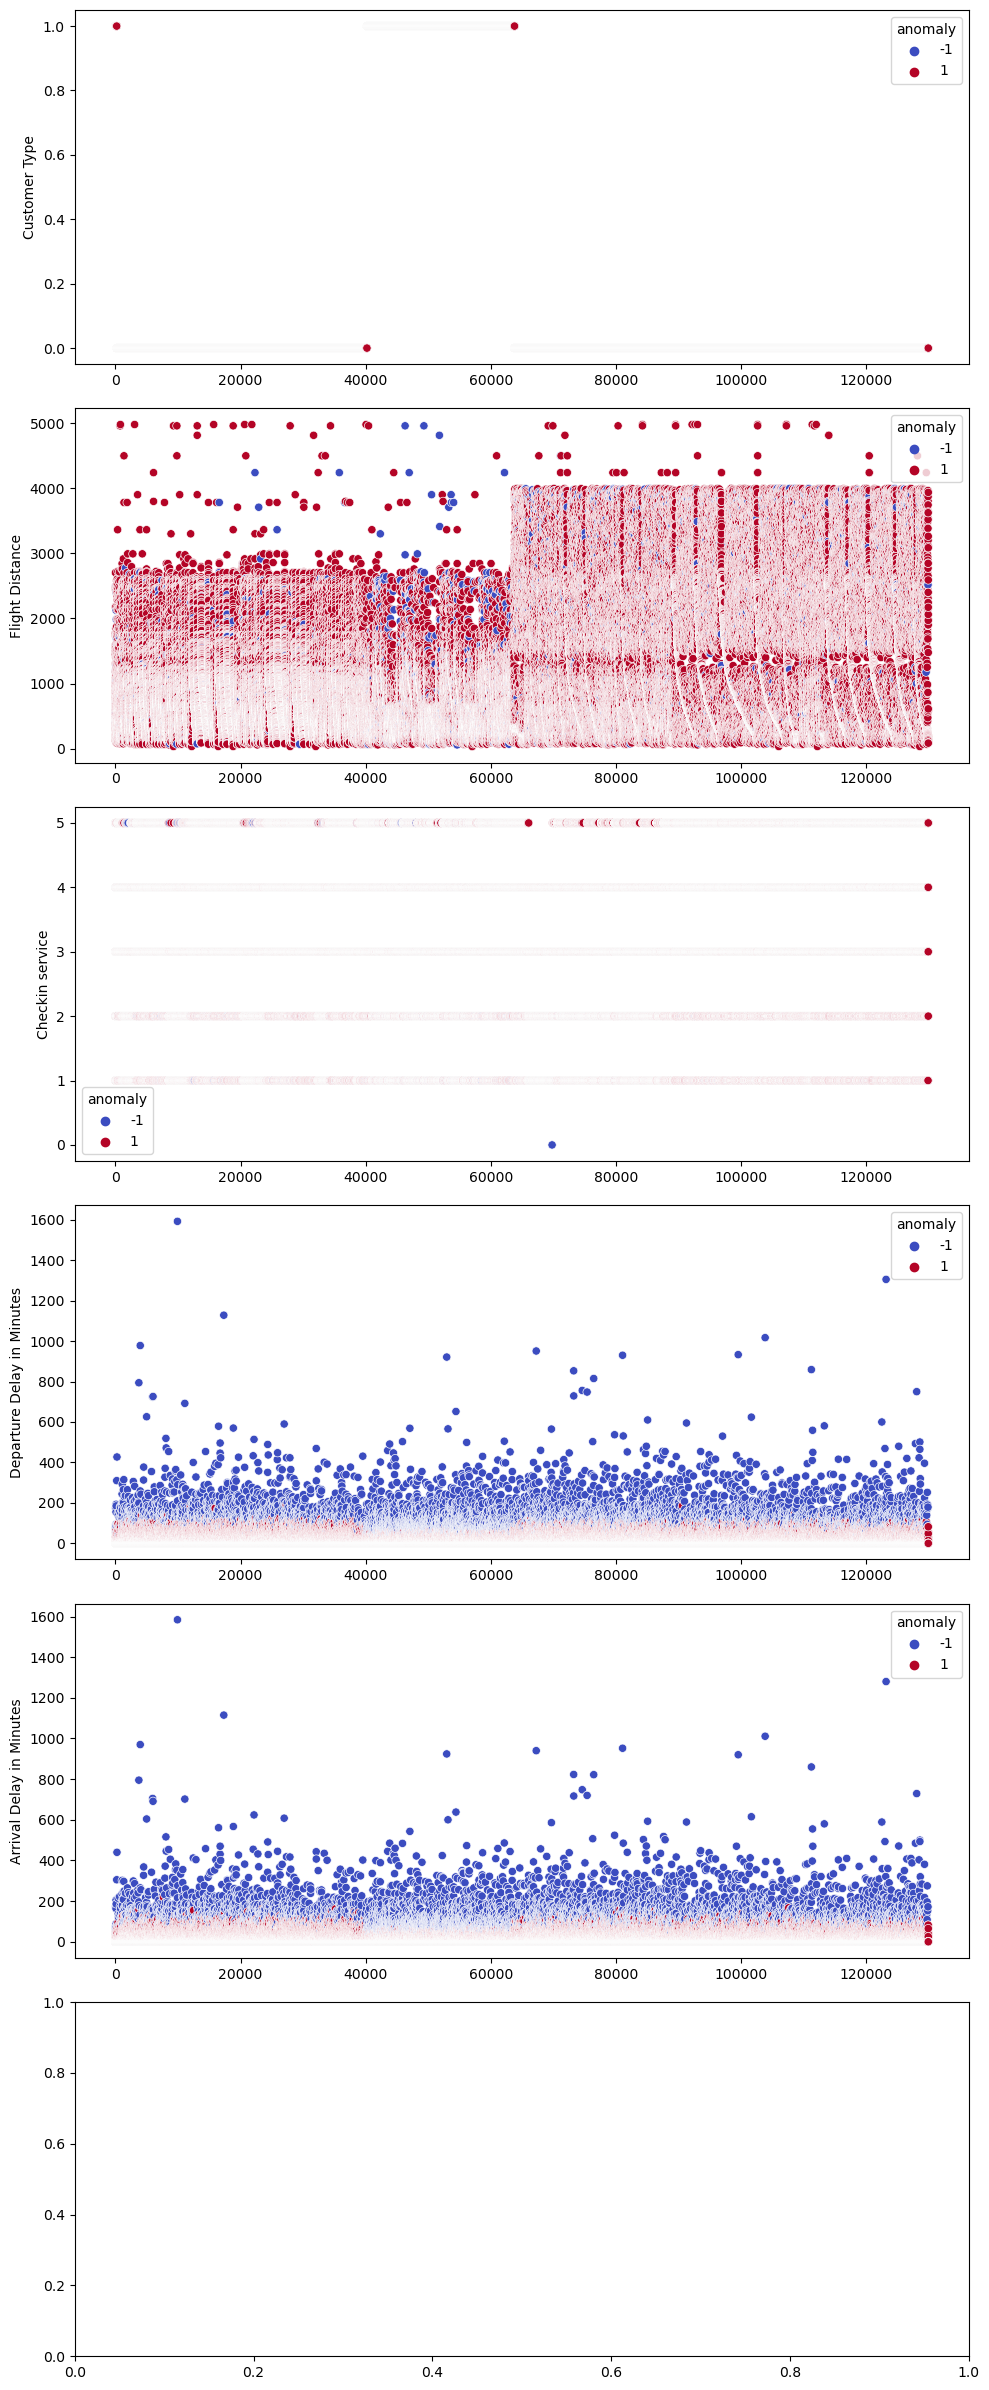

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Select only the required columns
selected_columns = ["Customer Type", "Flight Distance", "Checkin service", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
df_selected = df[selected_columns]

# Fitting the IsolationForest model
model = IsolationForest(contamination=0.05)
model.fit(df_selected)

# Creating a new column to store the anomaly prediction 
df_selected['anomaly'] = model.predict(df_selected)

# Find the number of anomalies and normal points here points classified -1 are anomalous
print(df_selected['anomaly'].value_counts())

# Visualizing the anomaly scores for each feature
fig, axs = plt.subplots(nrows=df_selected.shape[1], figsize=(10, 4 * df_selected.shape[1]))
for i, column in enumerate(df_selected.columns[:-1]):
    sns.scatterplot(x=range(df_selected.shape[0]), y=df_selected[column], hue=df_selected['anomaly'], palette='coolwarm', ax=axs[i])
plt.tight_layout()
plt.show()

For Customer Type:
There are no anomalies to be seen; the values are contained within the range [0, 1].

For Flight Distance:
The anomalies show that within certain ranges of the dataset, there are values that differ from the norm of that range. However, overall, they are within the expected value range.

For Check-in Service:
There is a single anomaly where a customer rated the Check-in Service a 0 compared to all other passengers who gave scores within the range of [1, 5].

For Departure Delay in Minutes and Arrival Delay in Minutes:
As shown, when the delay exceeds a certain amount of time (approximately 125-150 minutes), the delays become rare and are considered anomalies in the dataset.


Now that the data cleaning is complete, we'll move on to data exploration. We will use Matplotlib and Seaborn libraries to create histograms and other graphs from the cleaned dataframe by utilizing their visual statistical graphics.

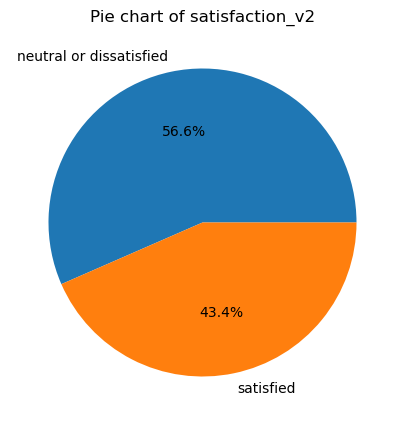

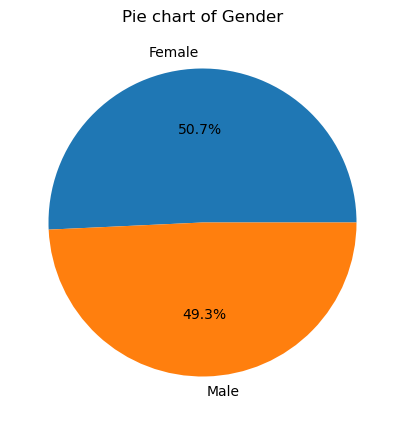

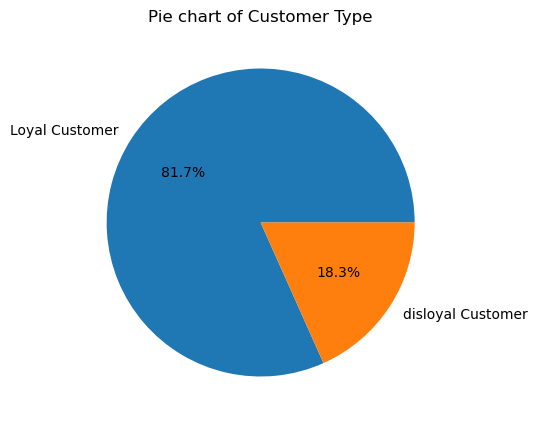

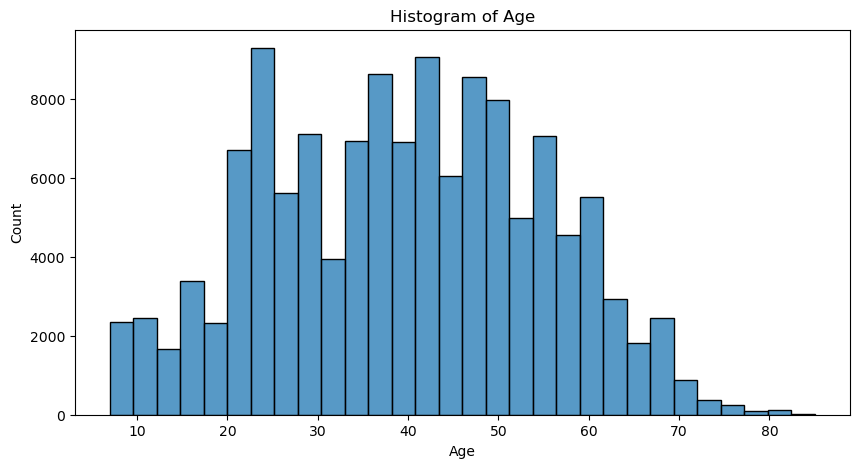

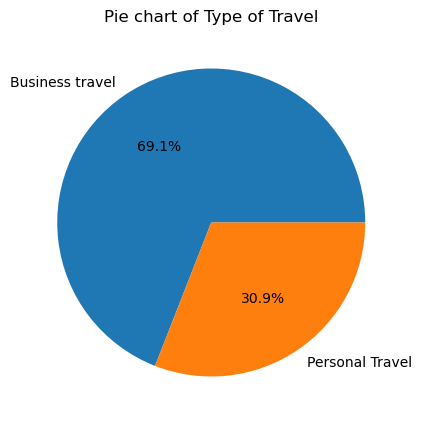

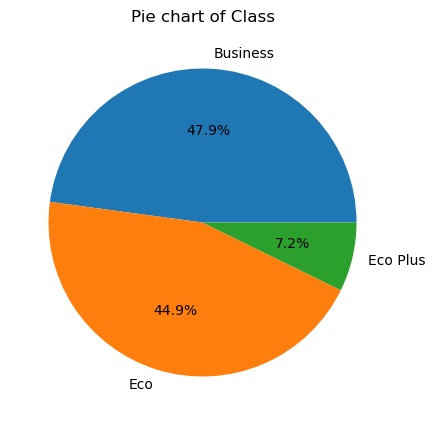

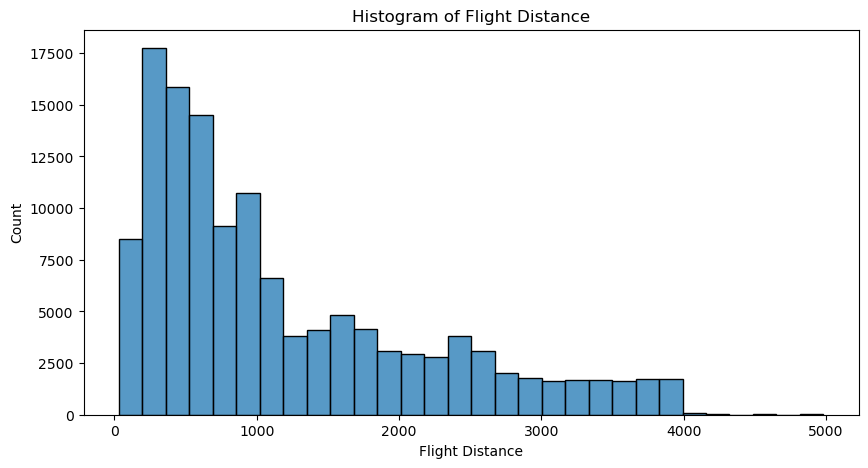

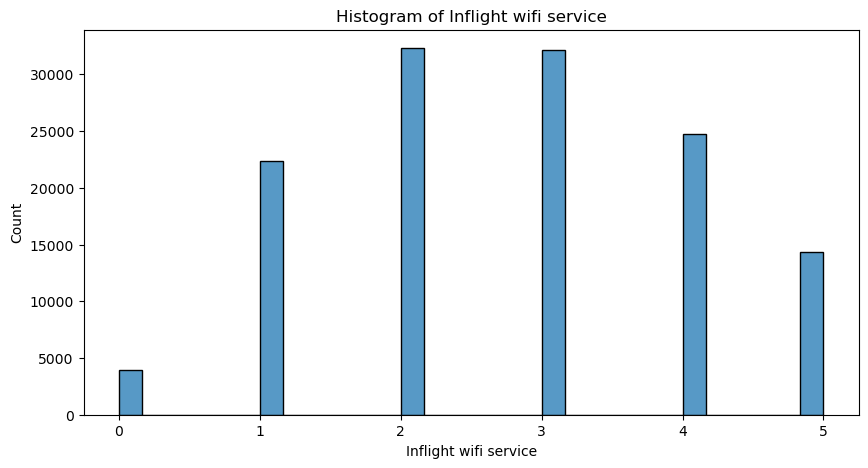

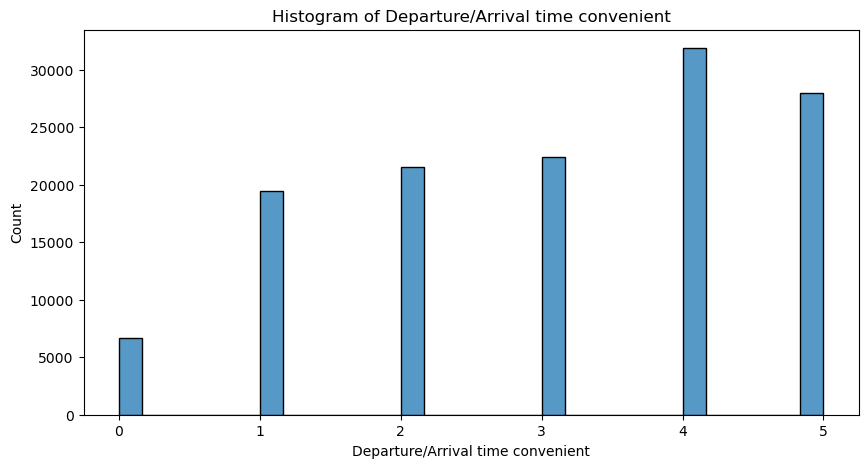

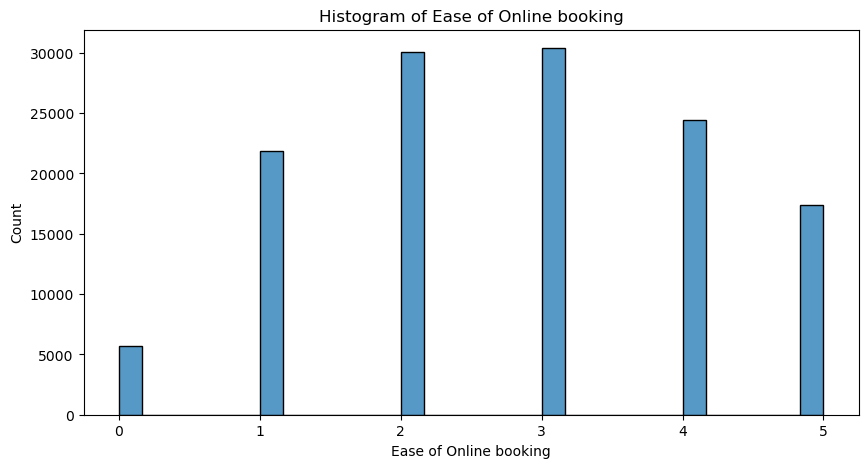

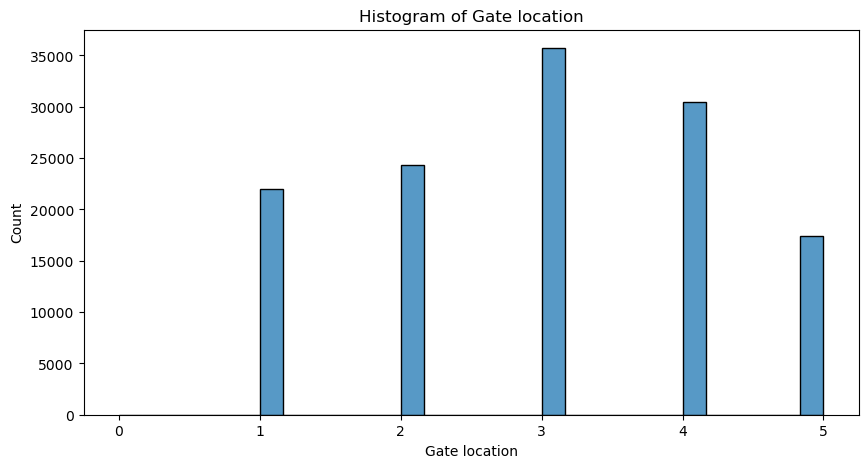

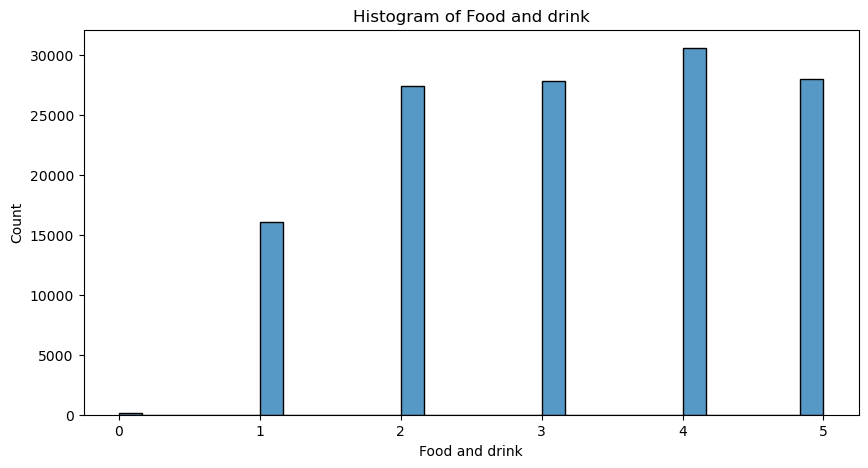

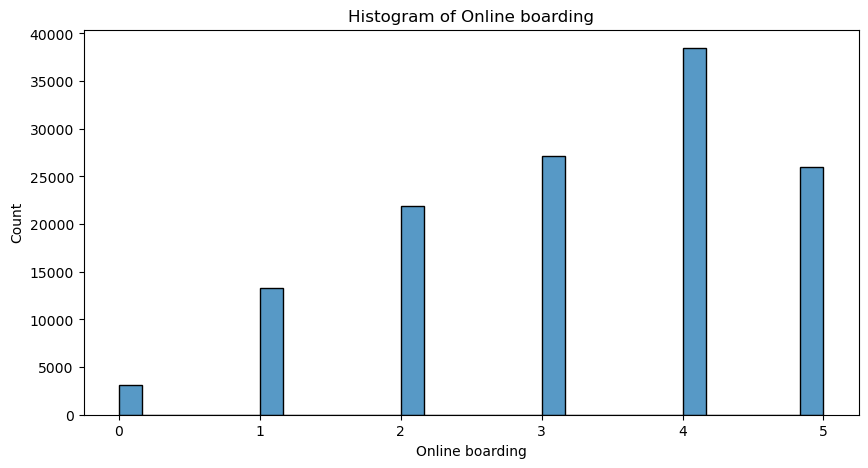

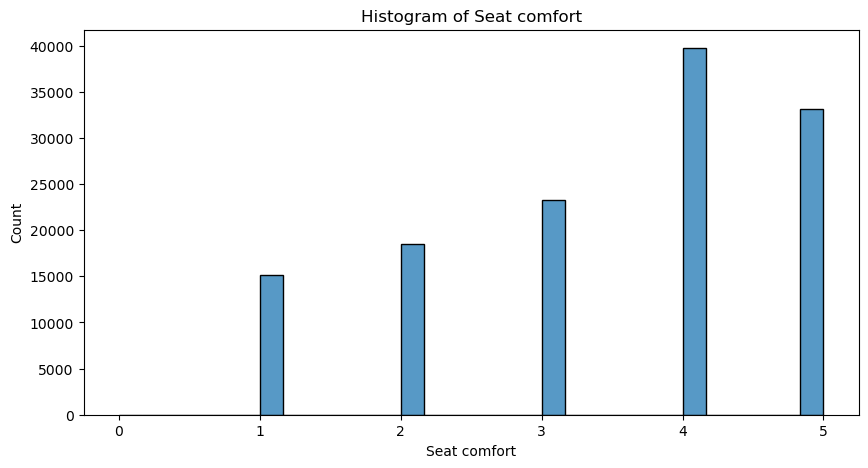

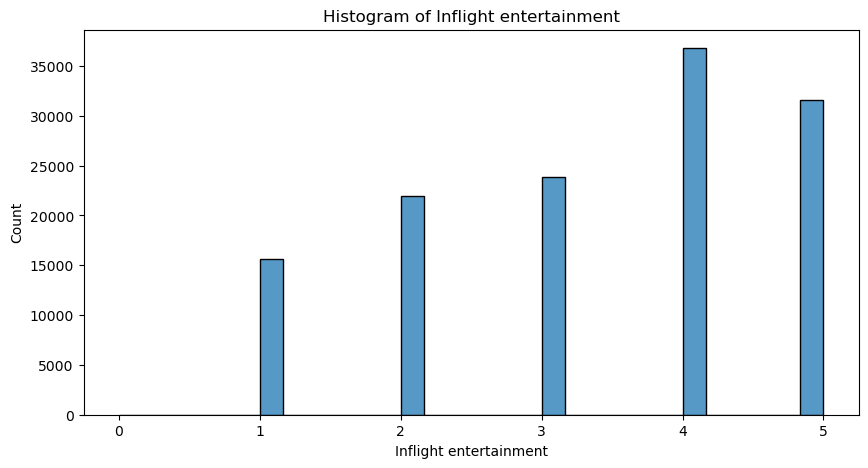

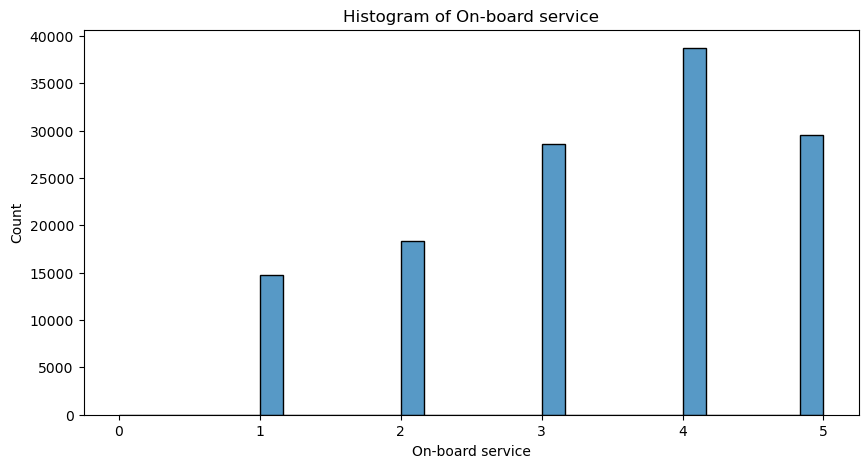

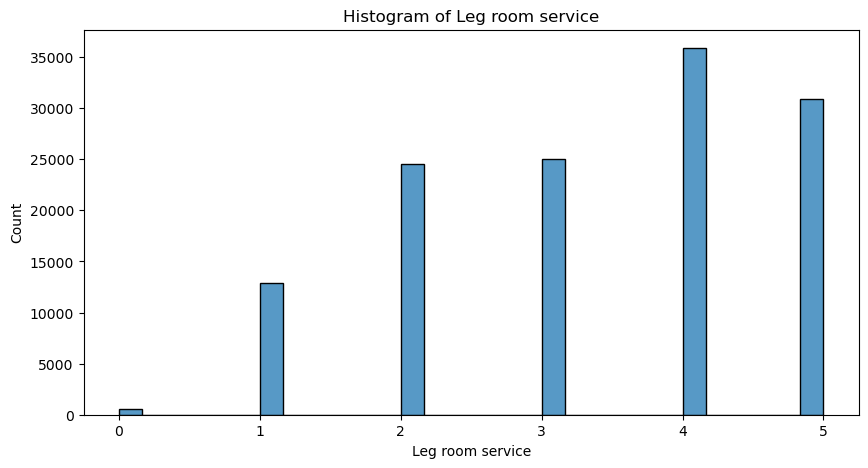

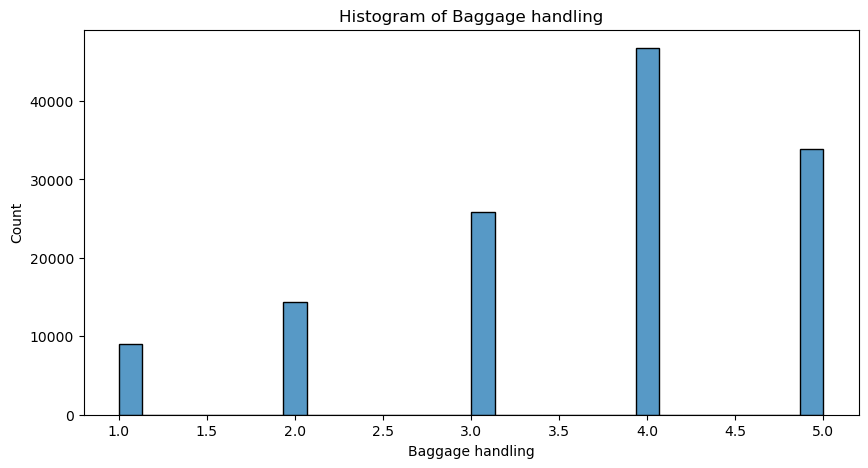

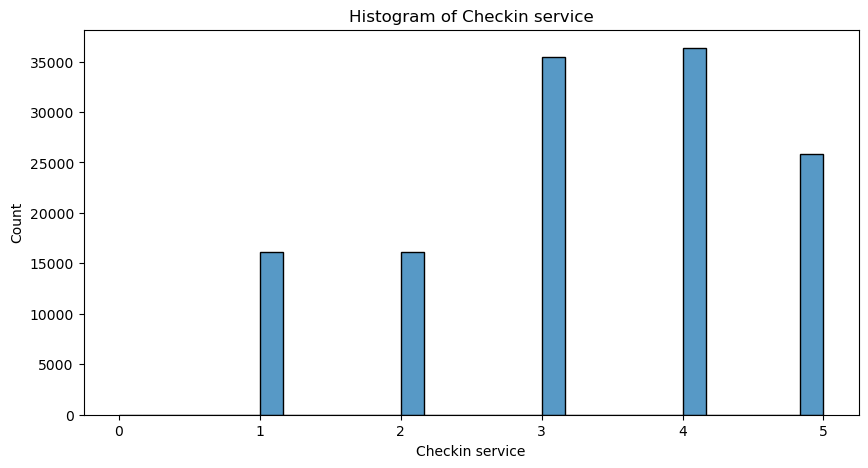

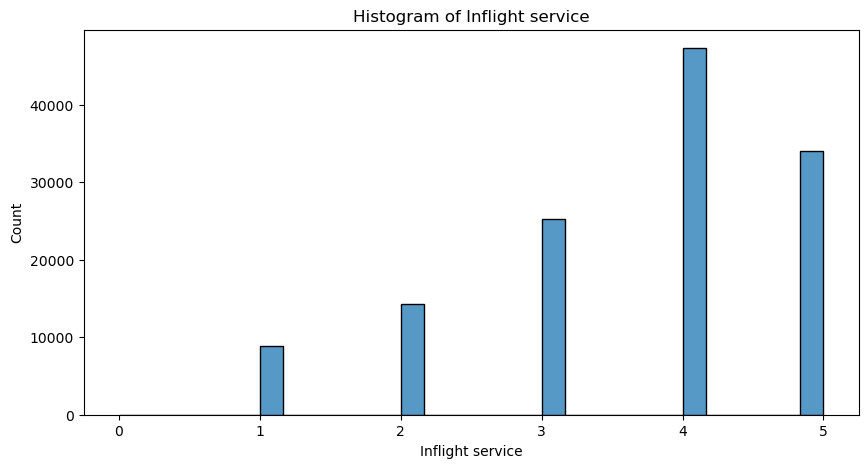

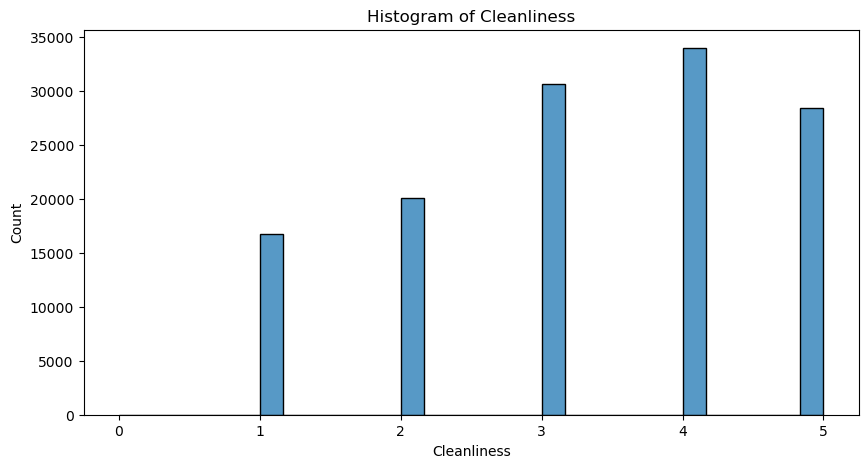

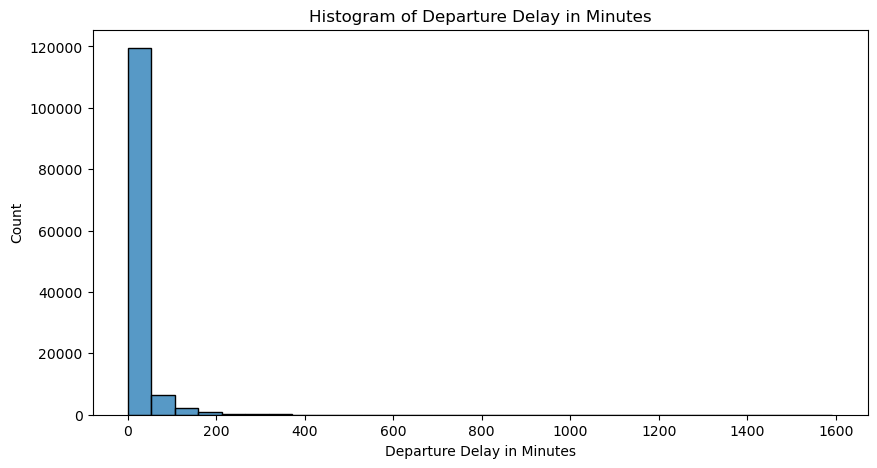

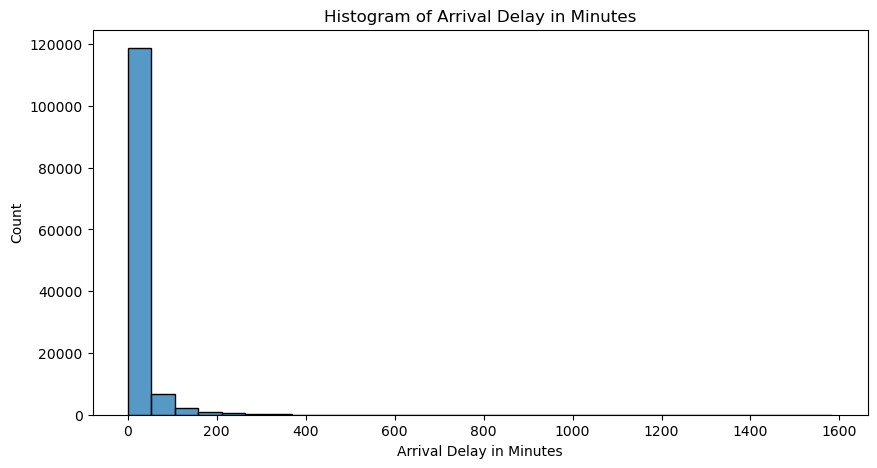

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure columns are numeric
df = df.apply(pd.to_numeric, errors='ignore')


# List of columns to make a pie chart
pie_chart_columns = ['satisfaction_v2', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

# Univariate Analysis
# Iterate over each column in the original DataFrame
for column in df_original.columns:
    # For columns in pie_chart_columns, make a pie chart
    if column in pie_chart_columns:
        # Calculate percentage of each unique value
        value_counts = df_original[column].value_counts(normalize=True) * 100
        
        # Create a pie chart
        plt.figure(figsize=(10, 5))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
        plt.title(f"Pie chart of {column}")
        plt.show()
    else:
        #print(f"\nColumn: {column}")
        
        # Print descriptive statistics
        #print(df[column].describe())
        
        # Draw a histogram
        plt.figure(figsize=(10, 5))
        sns.histplot(df_original[column], kde=False, bins=30)
        plt.title(f"Histogram of {column}")
        plt.show()

- As seen from the satisfaction pie chart, there are more dissatisfied customers than satisfied customers in the data set ([56.6%] Dissatisfied vs [43.4%] Satisfied).
- The number of passengers is almost evenly split between females and males, with [50.7%] female and [49.3%] male.
- Most passengers are loyal customers [81.7%].
- As seen in the Age histogram, most customers are between 20 and 60 years of age. There are few young passengers [<20] and very few older passengers [>60].
- The pie chart for the type of travel shows that business travel [69.1%] is more common compared to personal travel [30.9%].
- The pie chart for class contrasts with the type of travel, as both Eco [44.9%] and Eco Plus [7.2%] combined are greater than the number of business class travelers [47.9%].
- The flight distance histogram shows a higher amount of travel when the distance is less than 1000.
- A majority of individuals rate several categories (Inflight wifi service, Departure/Arrival time, Ease of Online booking, Gate location, Food and drink, Online boarding, Inflight entertainment, On-board service, Leg room service & Cleanliness) a score of [2-4] on a scale of [1-5]. This is interesting because many categories have similar scores. This could be because customers taking the survey may not want to be too negative [0-1] or overly positive [5].
- The scoring for seat comfort shows higher scores ranging from [2-5].
- The scoring for baggage handling shows higher scores in the [3-5] range.
- Check-in service is closely scored between [3-4].
- The scoring for inflight service shows higher scores in the [3-5] range.
- Most departure delays end before [<50] minutes, while arrivals are mostly delayed by the same amount of time.

We need to identify the main sources of dissatisfaction, as it represents more than half of the customers. To do this, we will compare Satisfaction vs Dissatisfaction for each category. For categories with large ranges, we'll need to create bins to display the results effectively.

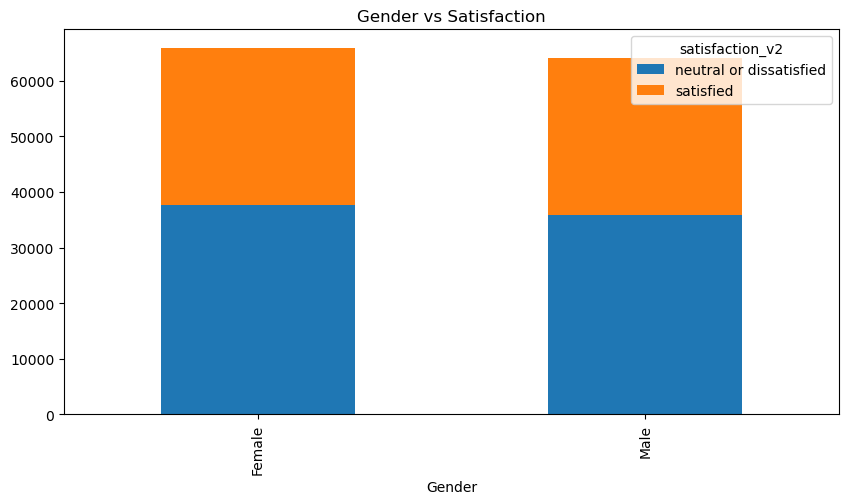

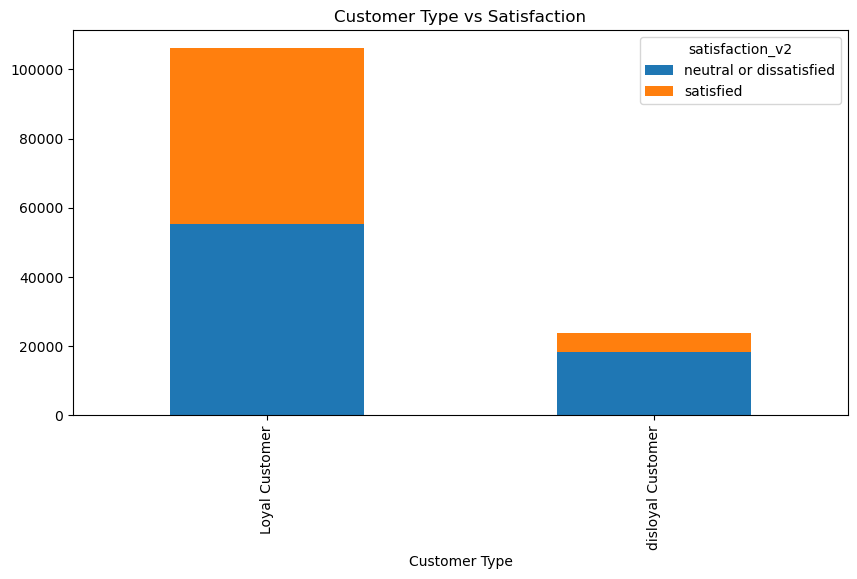

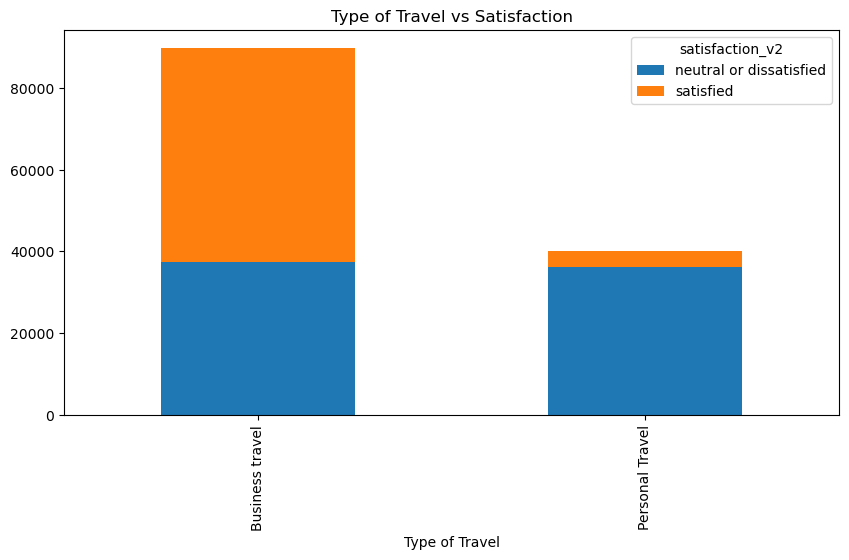

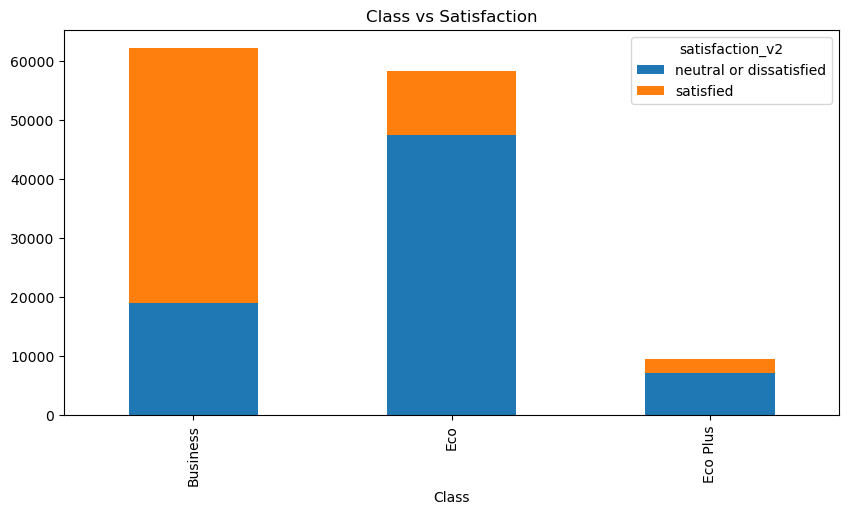

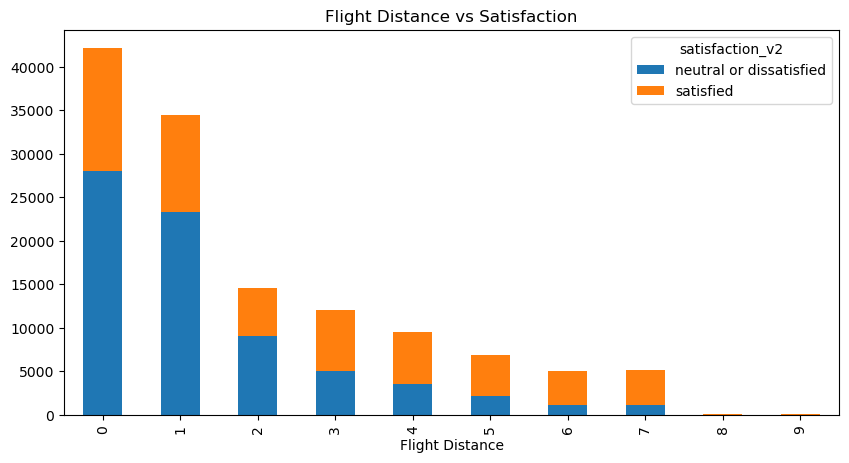

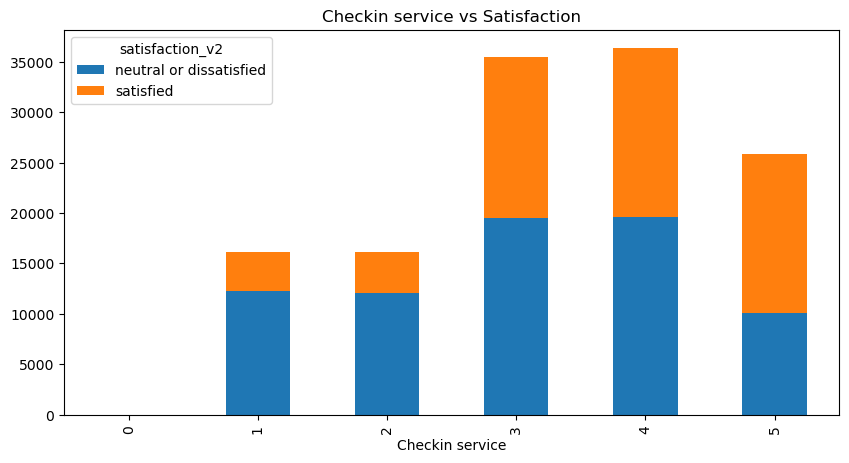

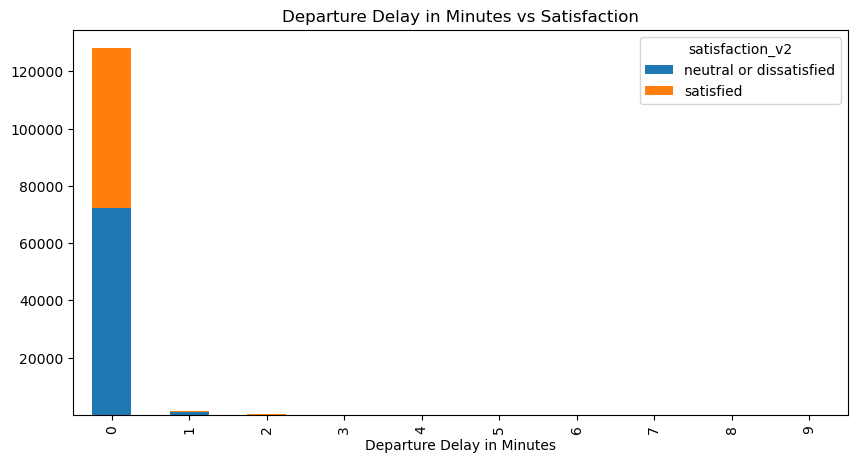

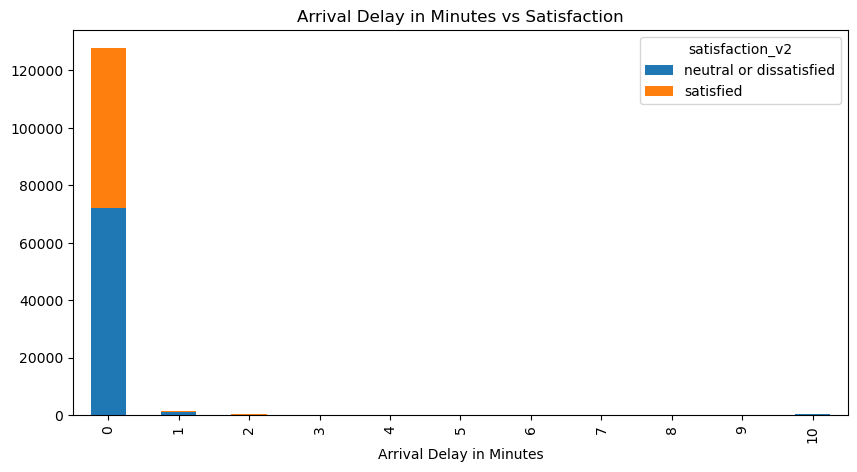

In [ ]:
# List of columns to make a pie chart
pie_chart_columns = ['satisfaction_v2', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

# Columns to compare with satisfaction
compare_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Checkin service', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

for column in compare_columns:
    # If the column is numeric and has a large range, bin the values
    if df_original[column].dtype != np.object and df_original[column].nunique() > 10:
        df_original[column] = pd.cut(df_original[column], bins=10)
        le.fit(df_original[column])
        df_original[column] = le.transform(df_original[column])
    
    # Create cross-tabulation between satisfaction_v2 and the current column
    cross_tab = pd.crosstab(df_original[column], df_original['satisfaction_v2'])

    # Create a stacked bar plot
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title(f"{column} vs Satisfaction")
    plt.show()

As shown, most categories have an even distribution of satisfied customers vs dissatisfied customers (when compared to the values, such as having more dissatisfied customers at 1 and more satisfied customers at 5). However, when looking at the Type of Travel and Class categories, this isn't the case. A majority of the Eco and Eco Plus classes, which make up personal travel, show higher numbers of dissatisfied customers compared to the satisfied ones. In contrast, most business-class [47.9%] and business travel customers show satisfied results.

It can be concluded that most dissatisfaction comes primarily from the Eco/Eco Plus group of customers traveling for personal reasons. Business-class (and business travel) offers higher comfort and luxury compared to Eco and Eco Plus, resulting in their higher satisfaction.

To investigate the reasons for the dissatisfaction in the Eco/Eco Plus class and personal travelers, we must compare the four groups:

- 1) Personal travelers in the Eco/Eco Plus class
- 2) Business travelers in the Business class
- 3) Business travelers in the Eco/Eco Plus class
- 4) Personal travelers in the Business class

In [ ]:
# Total number of rows
print(f"Number of rows: {df.shape[0]}")
# Filter rows where 'Type of Travel' is 'Personal' and 'Class' is 'Eco' & 'Eco Plus'
filtered1_df = df_original[(df['Type of Travel'] == 1) & (df['Class'].isin([1,2]))]
print(f"Number of rows where 'Type of Travel' is 'Personal' and 'Class' is 'Eco' & 'Eco Plus': {filtered1_df.shape[0]}")
# Filter rows where 'Type of Travel' is 'Business' and 'Class' is 'Business'
filtered2_df = df_original[(df['Type of Travel'] == 0) & (df['Class'].isin([0]))]
print(f"Number of rows where 'Type of Travel' is 'Business' and 'Class' is 'Business': {filtered2_df.shape[0]}")
# Filter rows where 'Type of Travel' is 'Business' and 'Class' is 'Eco' & 'Eco Plus'
filtered3_df = df_original[(df['Type of Travel'] == 0) & (df['Class'].isin([1,2]))]
print(f"Number of rows where 'Type of Travel' is 'Business' and 'Class' is 'Eco' & 'Eco Plus': {filtered3_df.shape[0]}")
# Filter rows where 'Type of Travel' is 'Personal' and 'Class' is 'Business'
filtered4_df = df_original[(df['Type of Travel'] == 1) & (df['Class'].isin([0]))]
print(f"Number of rows where 'Type of Travel' is 'Personal' and 'Class' is 'Business': {filtered4_df.shape[0]}")

Number of rows: 129880
Number of rows where 'Type of Travel' is 'Personal' and 'Class' is 'Eco' & 'Eco Plus': 37514
Number of rows where 'Type of Travel' is 'Business' and 'Class' is 'Business': 59487
Number of rows where 'Type of Travel' is 'Business' and 'Class' is 'Eco' & 'Eco Plus': 30206
Number of rows where 'Type of Travel' is 'Personal' and 'Class' is 'Business': 2673


Number of rows where 'Type of Travel' is 'Personal' and 'Class' is 'Eco' or 'Eco Plus': 37514


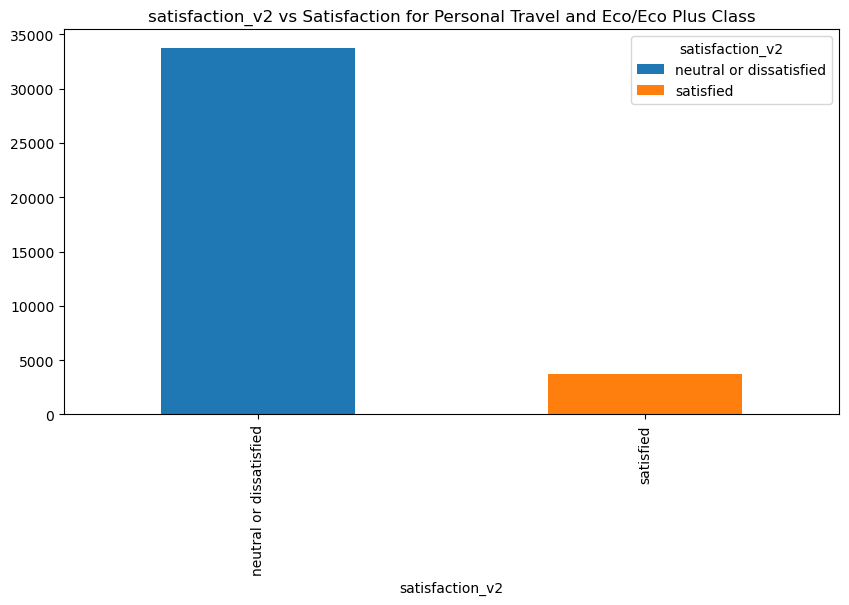

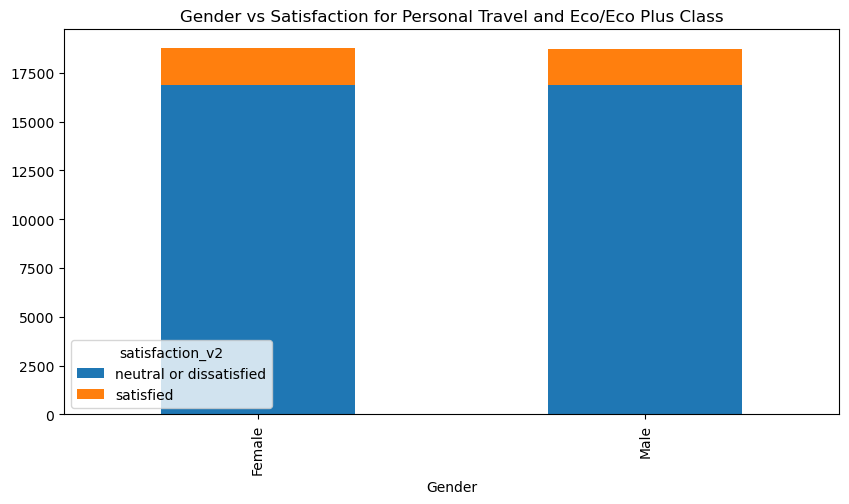

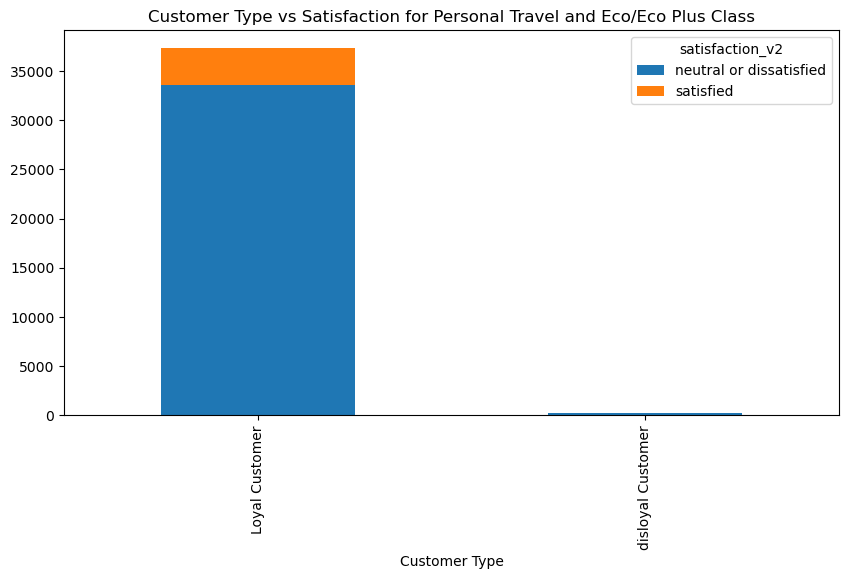

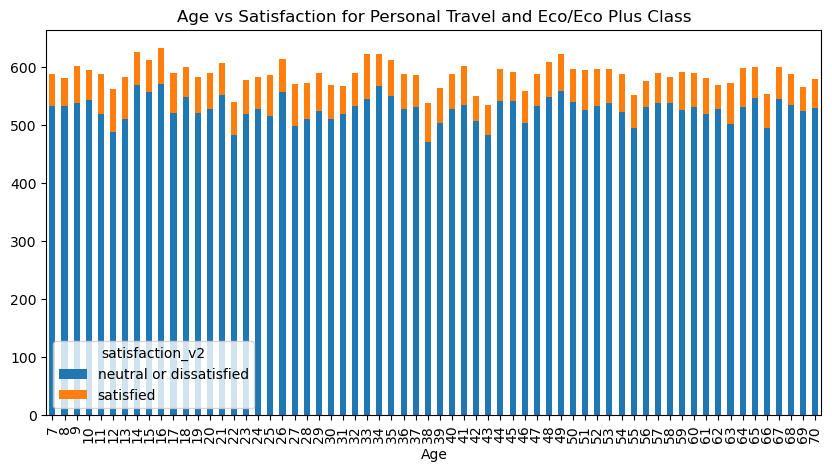

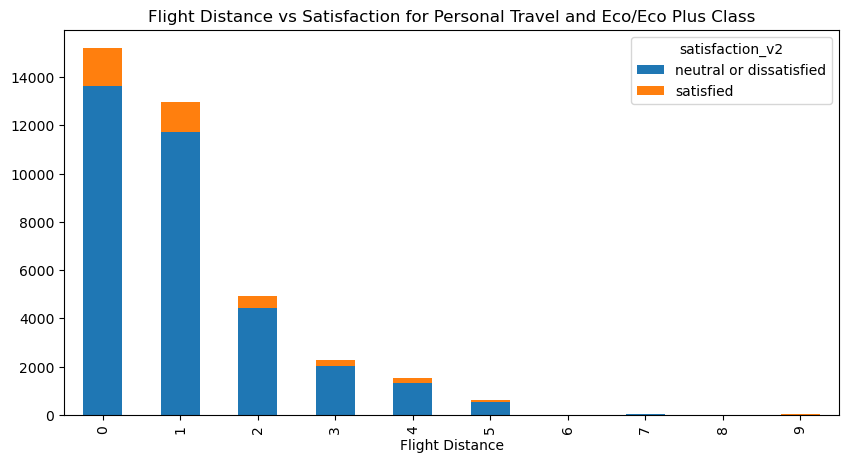

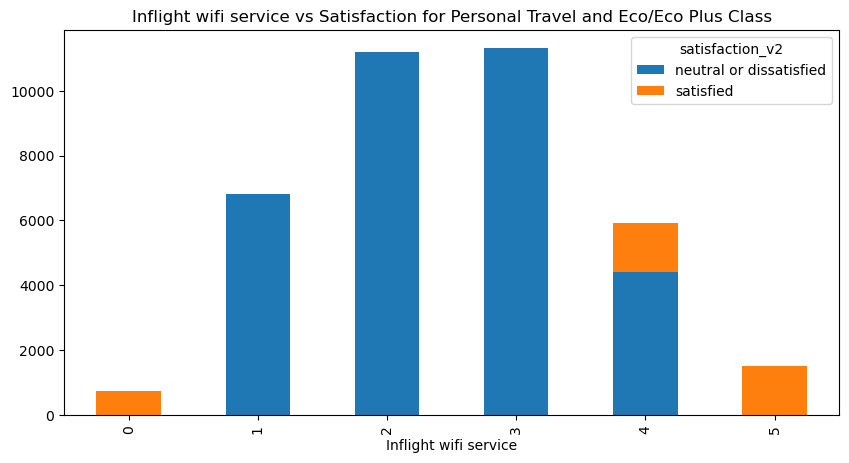

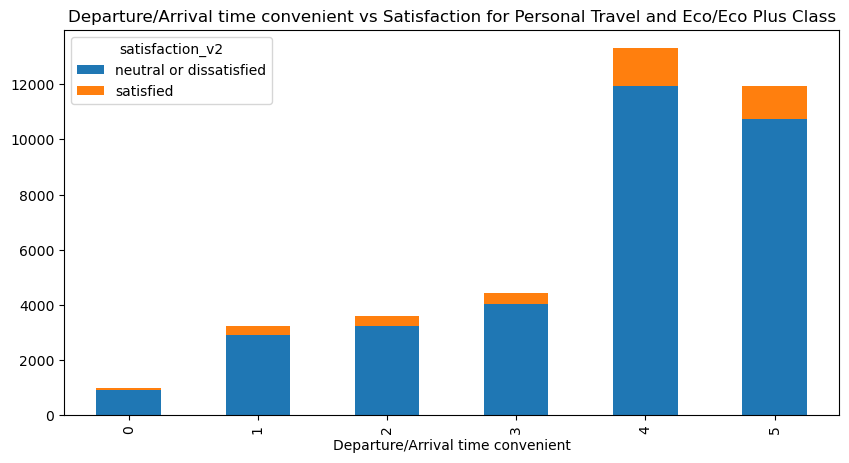

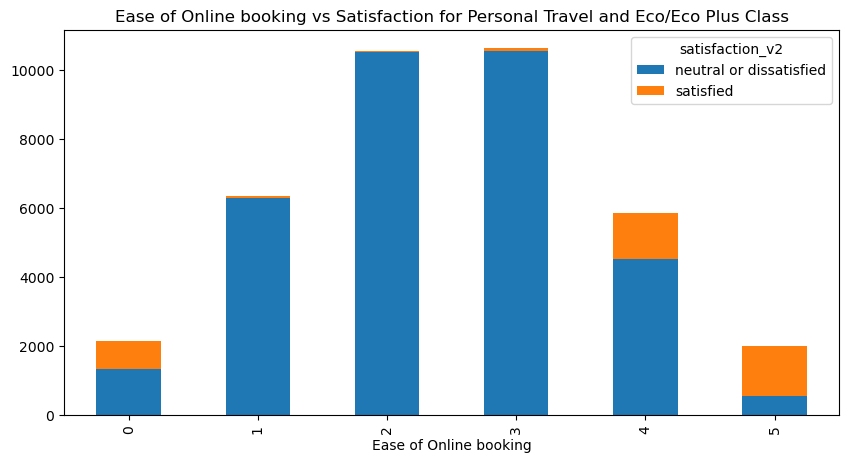

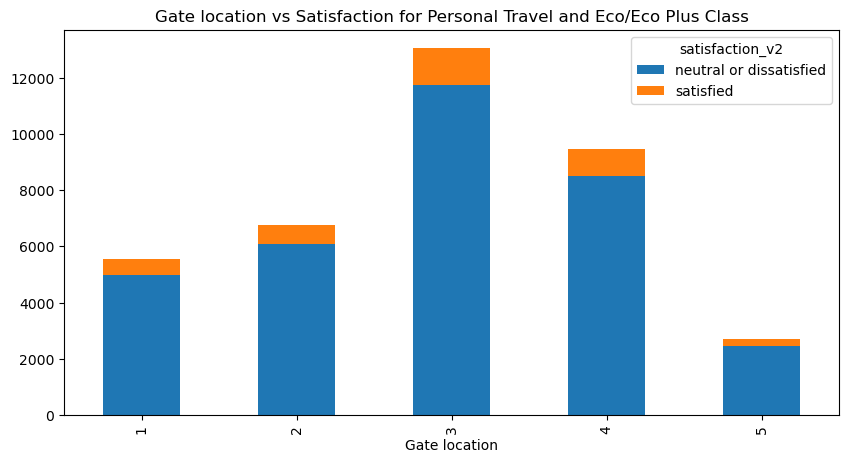

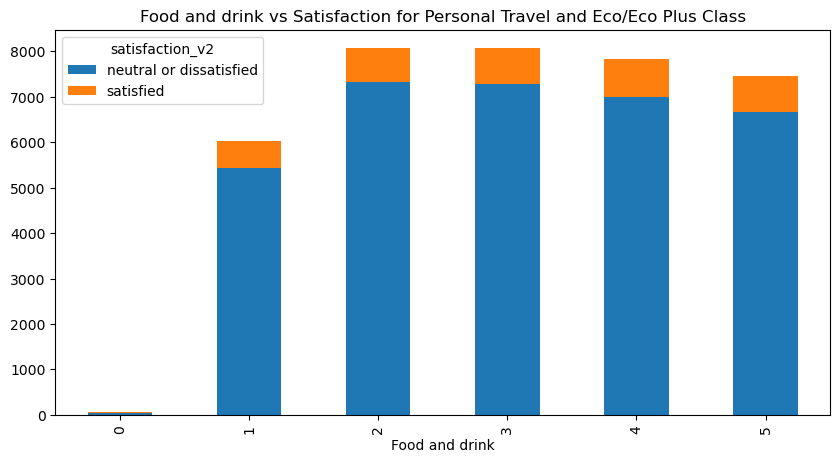

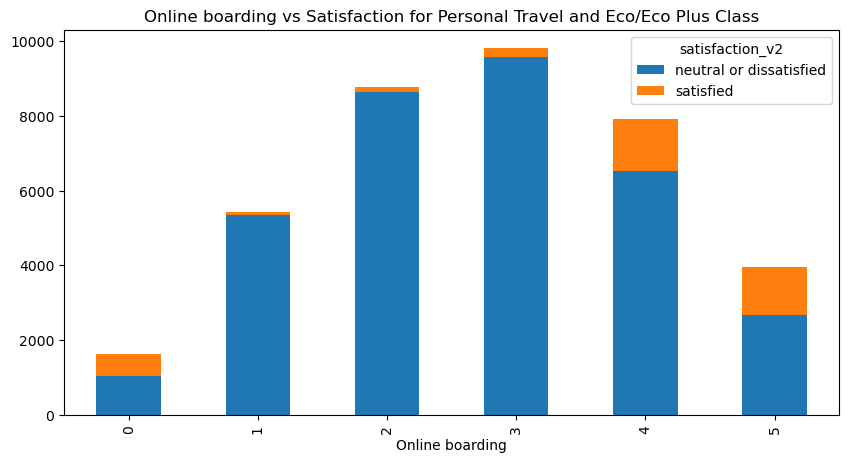

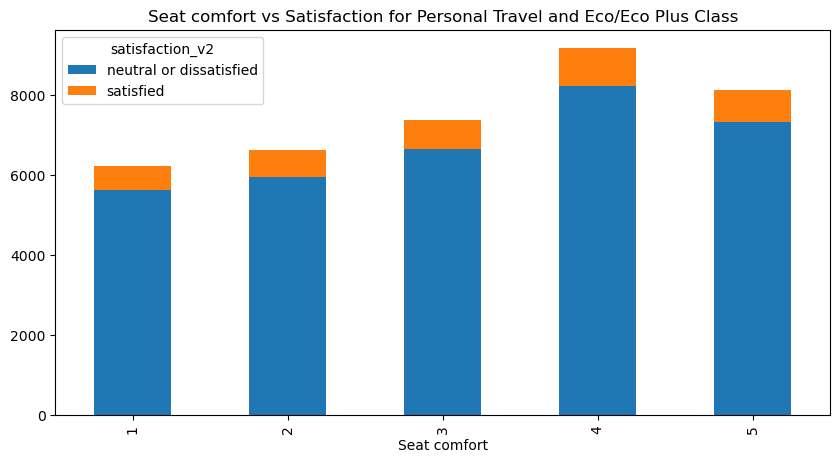

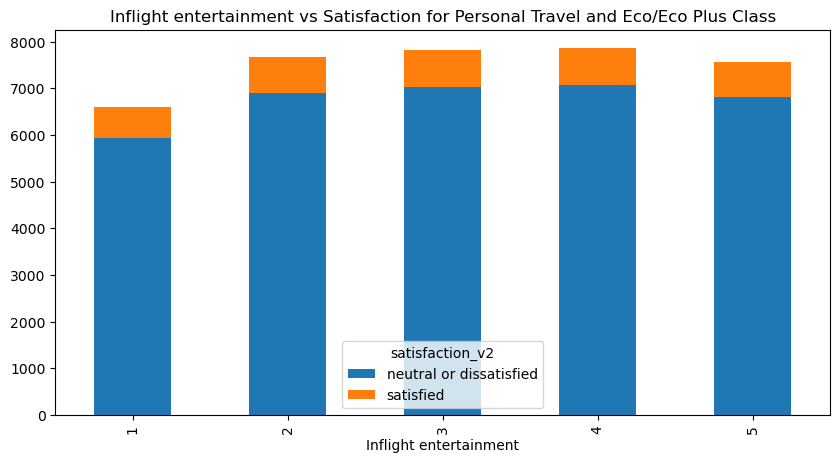

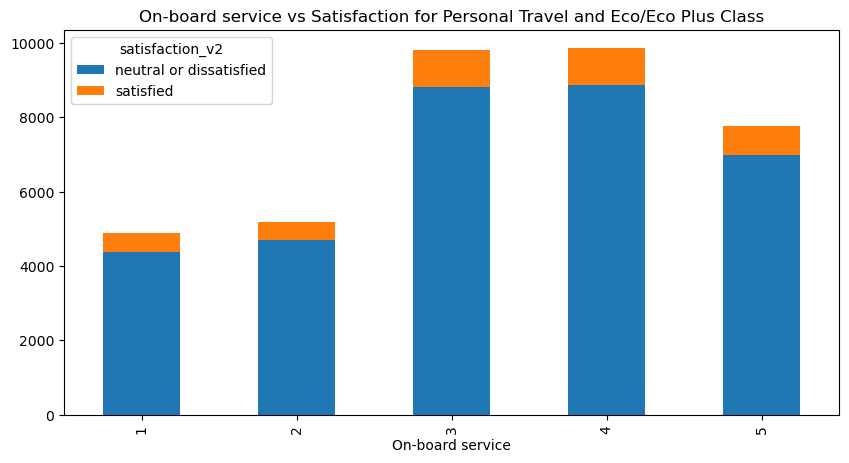

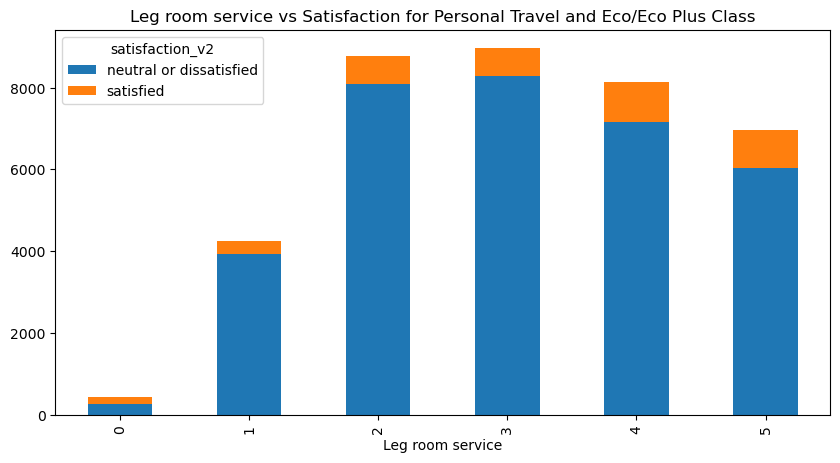

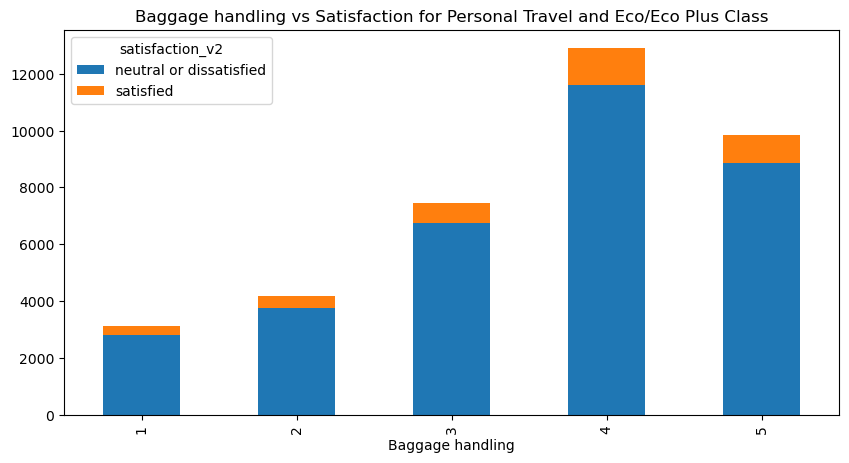

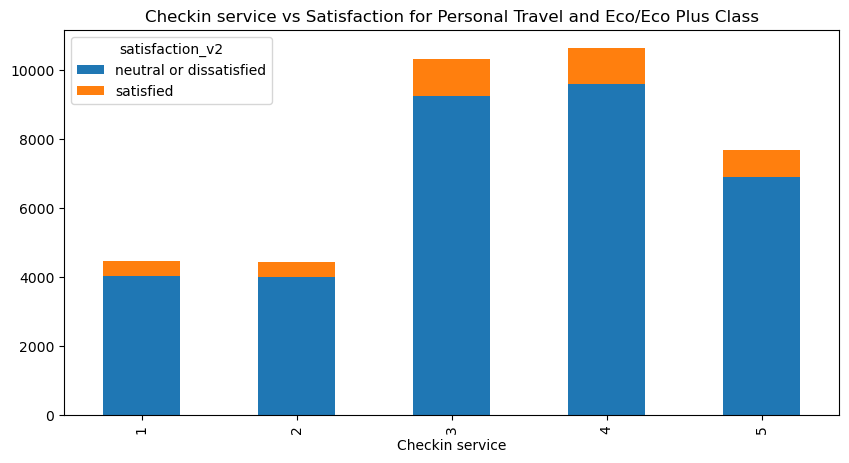

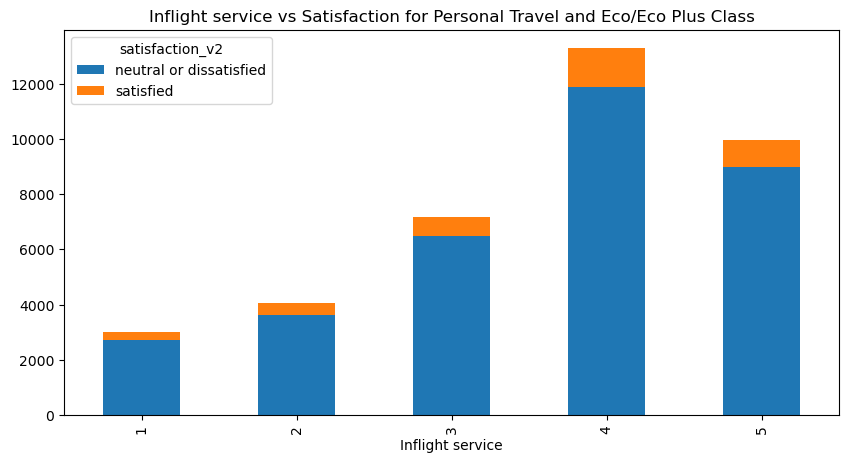

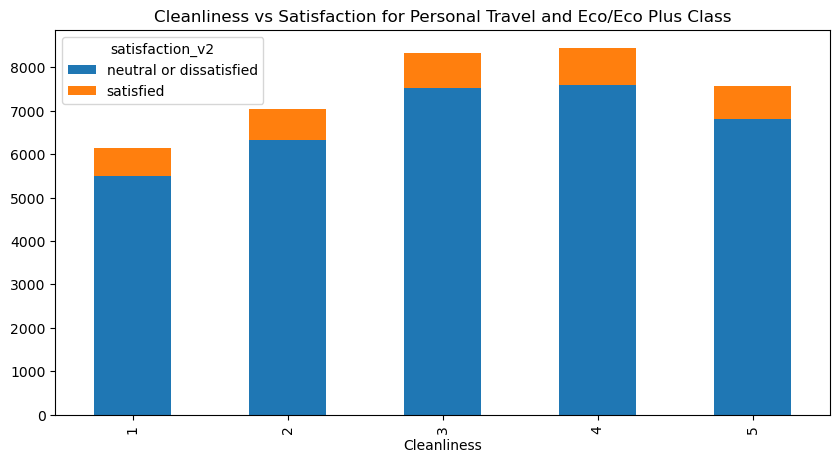

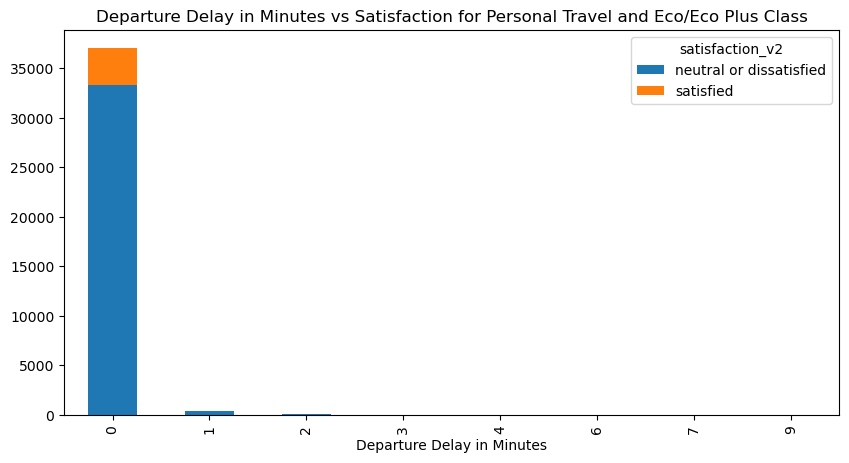

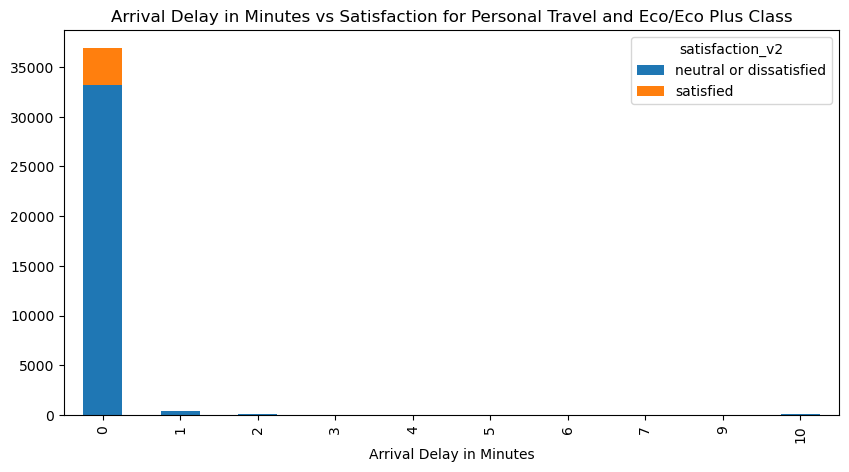

In [ ]:
# Filter rows where 'Type of Travel' is 'Personal' and 'Class' is 'Eco' or 'Eco Plus'
print(f"Number of rows where 'Type of Travel' is 'Personal' and 'Class' is 'Eco' or 'Eco Plus': {filtered1_df.shape[0]}")
# Iterate over each column in the filtered DataFrame
for column in filtered1_df.columns:
    # Exclude 'Type of Travel' and 'Class' from the comparison
    if column not in ['Type of Travel', 'Class']:
        # Create cross-tabulation between the current column and 'satisfaction_v2'
        cross_tab = pd.crosstab(filtered1_df[column], filtered1_df['satisfaction_v2'])

        # Create a stacked bar plot
        cross_tab.plot(kind='bar', stacked=True, figsize=(10, 5))
        plt.title(f"{column} vs Satisfaction for Personal Travel and Eco/Eco Plus Class")
        plt.show()

When examining the personal traveling Eco/Eco Plus class, there is an overwhelming amount of dissatisfaction among this group regardless of the category being considered. It can be concluded that their experience, no matter how highly they rate a category, will result in a dissatisfactory outcome. Next, let's analyze the business travel and business class group.

Number of rows where 'Type of Travel' is 'Business' and 'Class' is 'Business': 59487


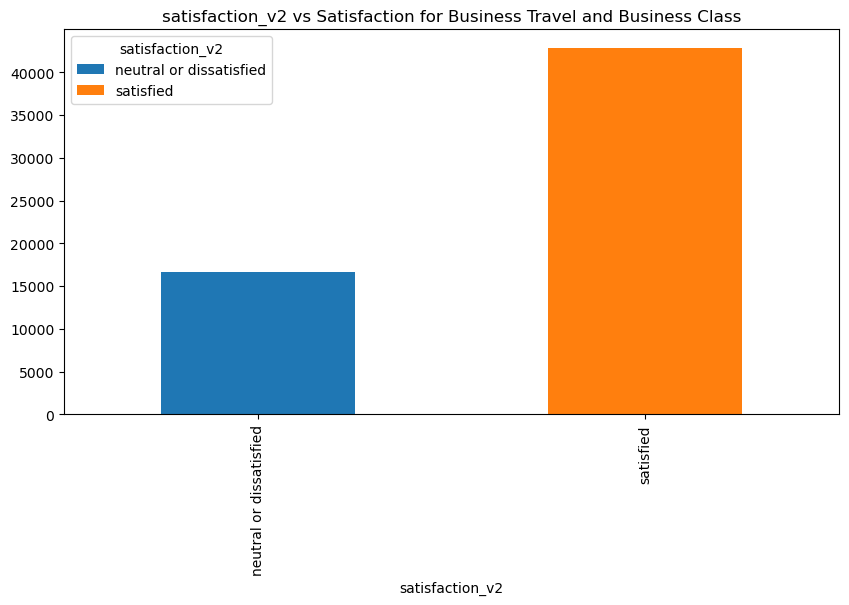

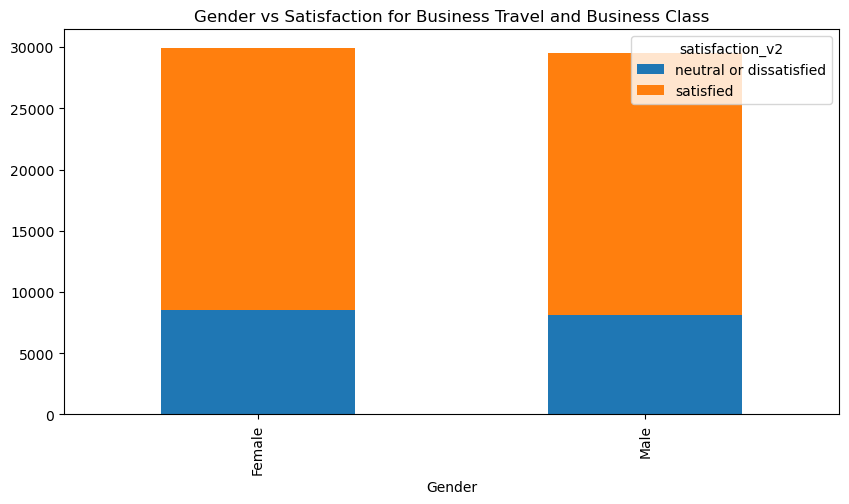

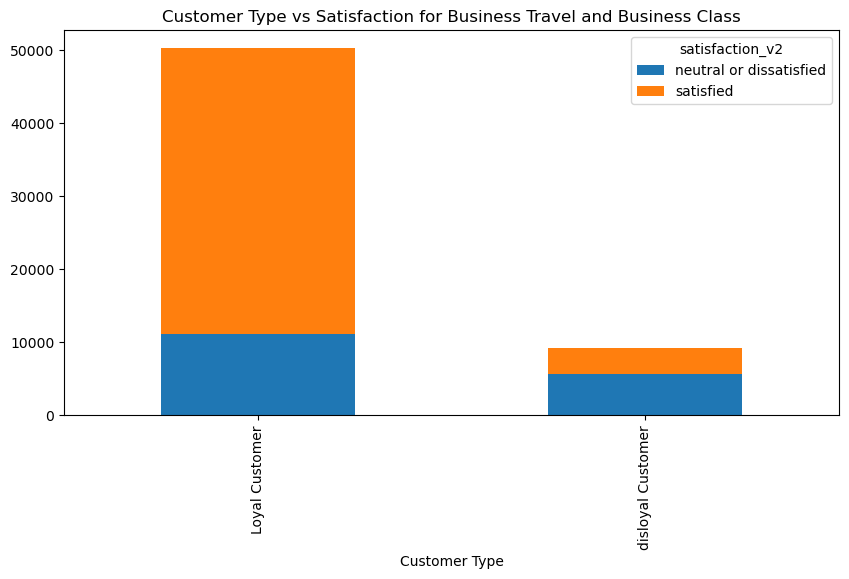

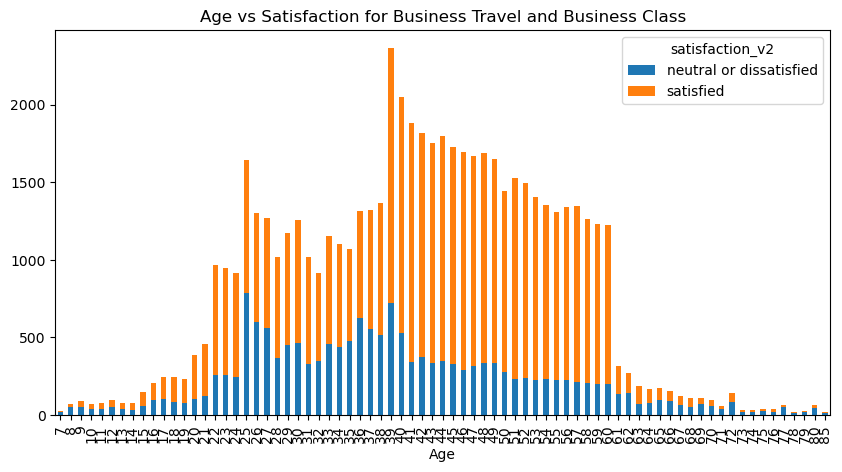

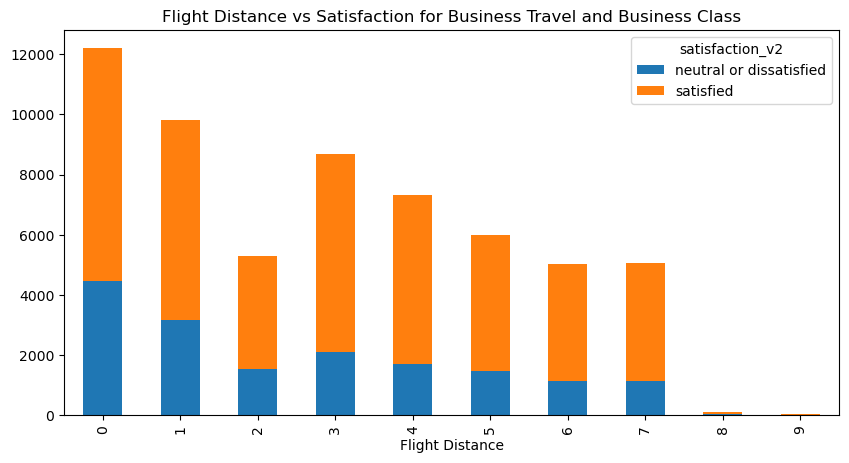

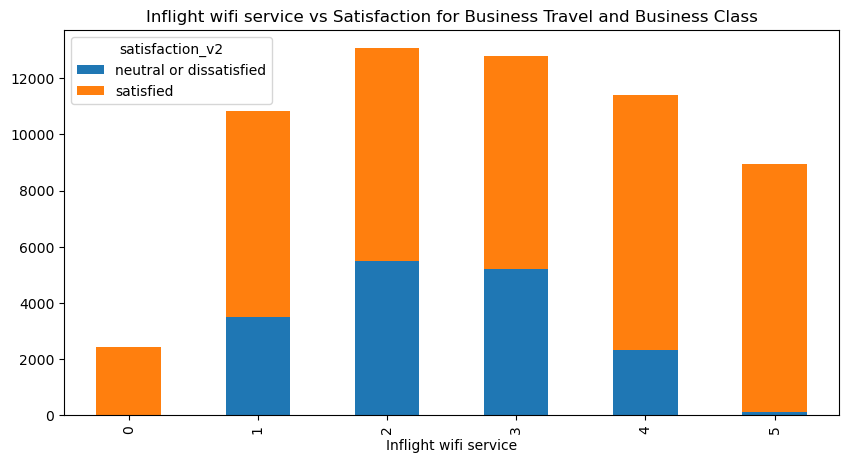

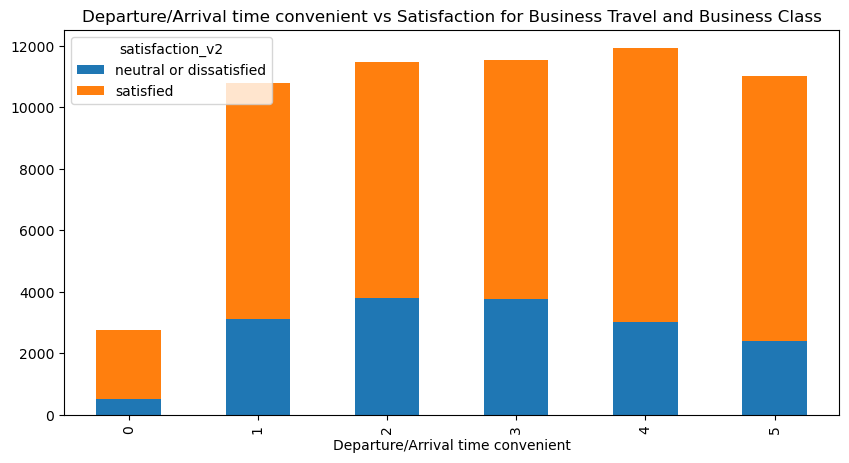

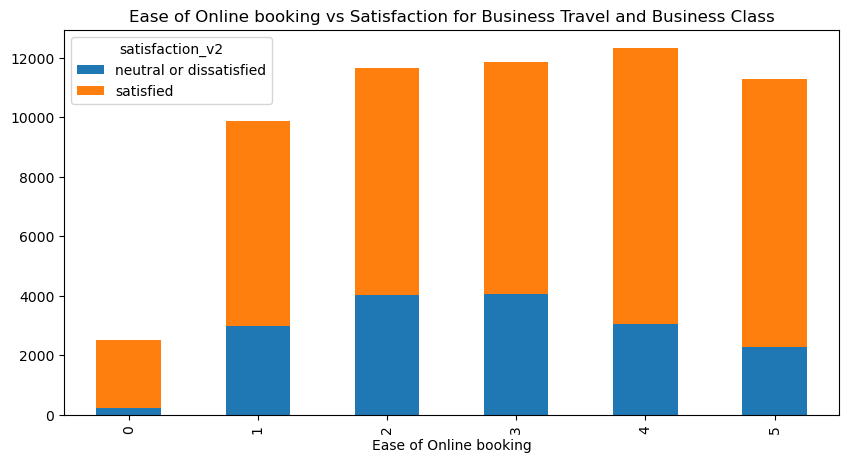

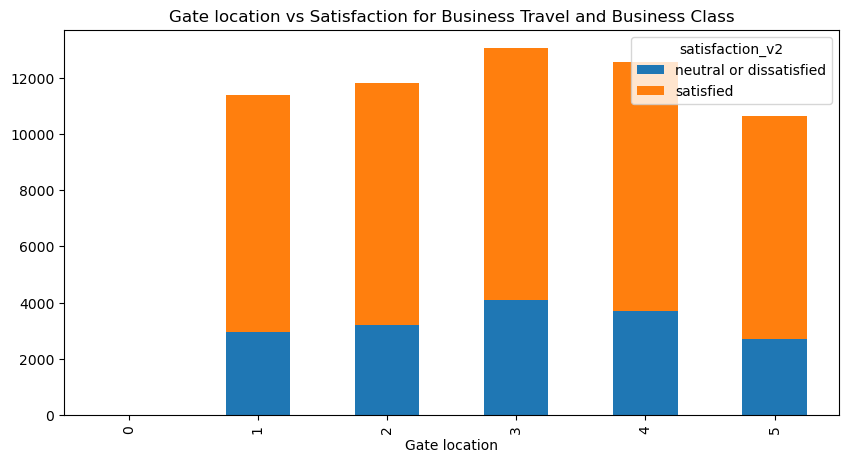

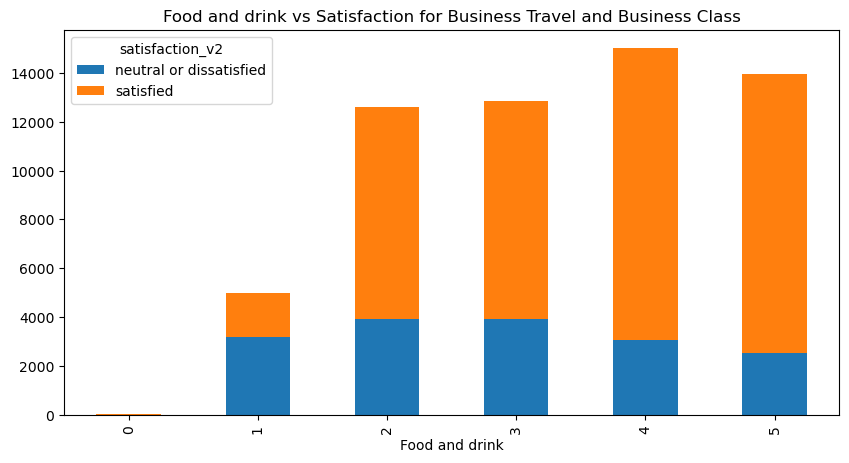

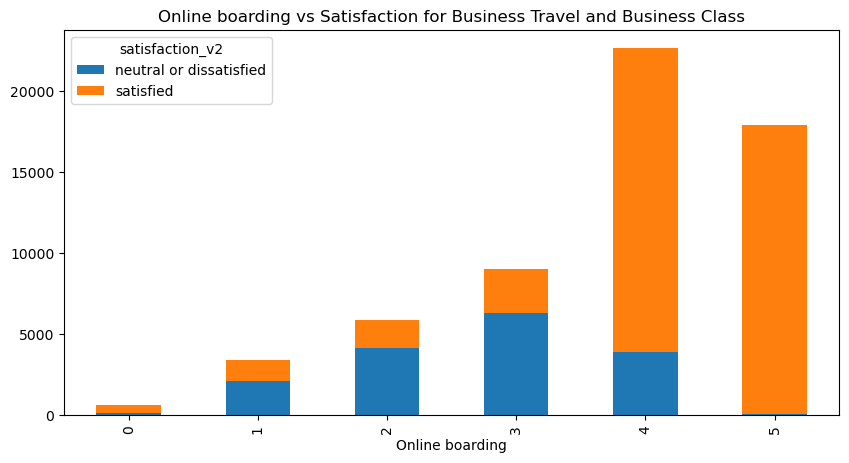

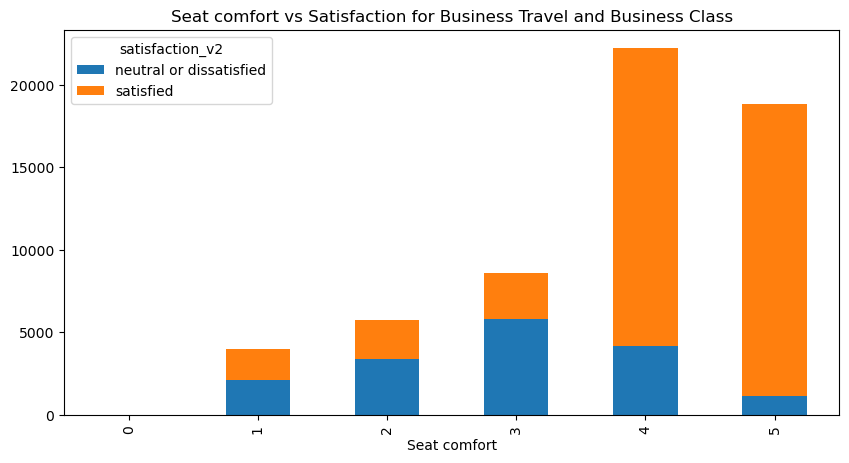

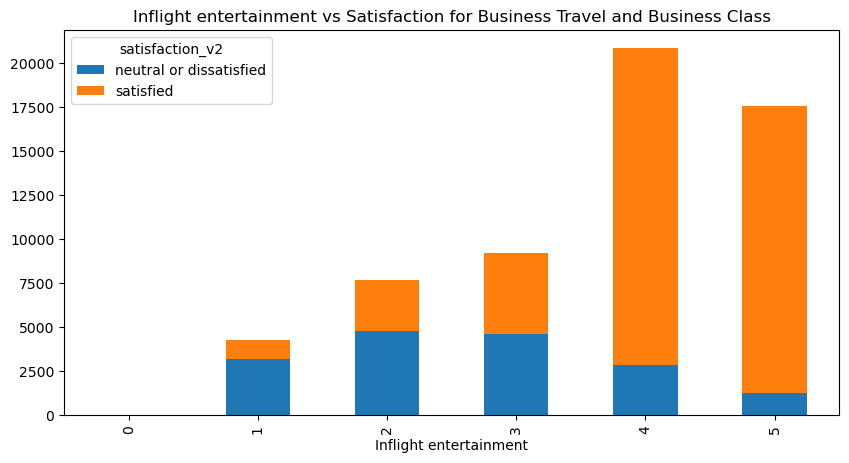

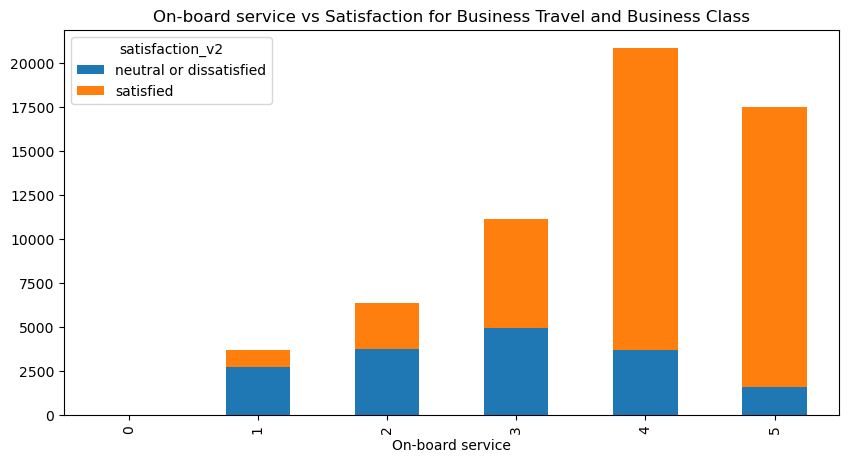

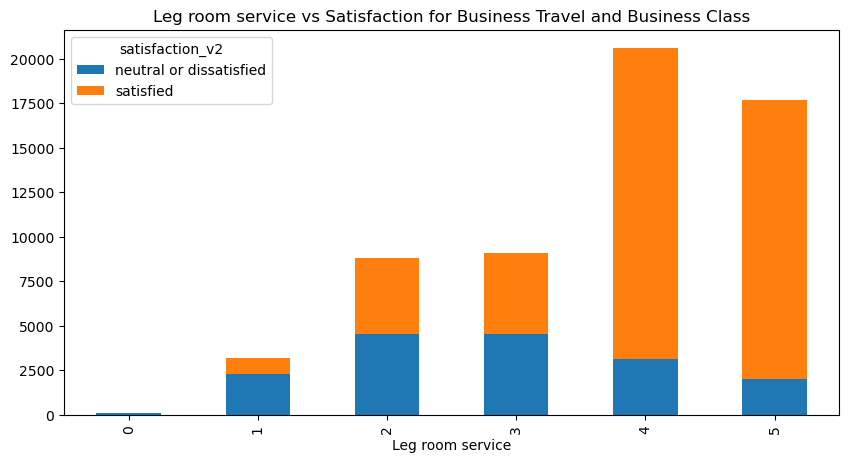

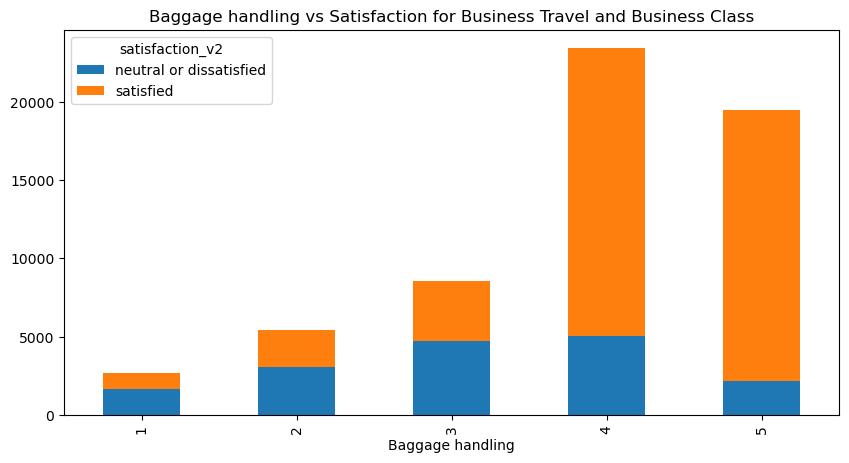

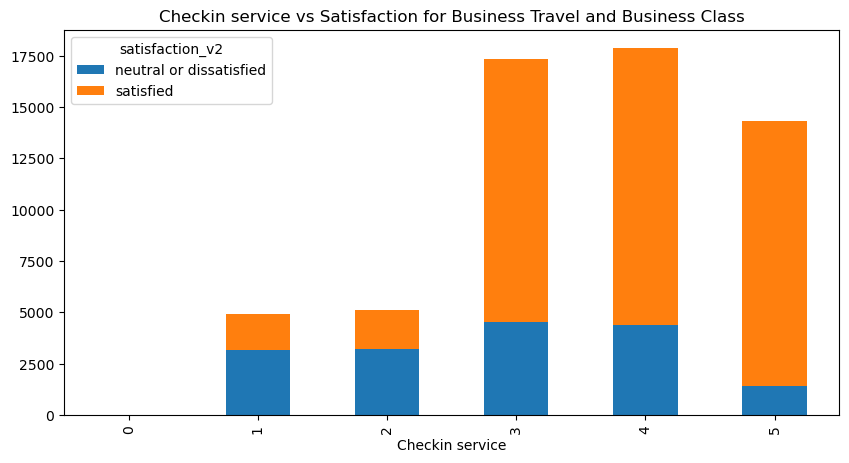

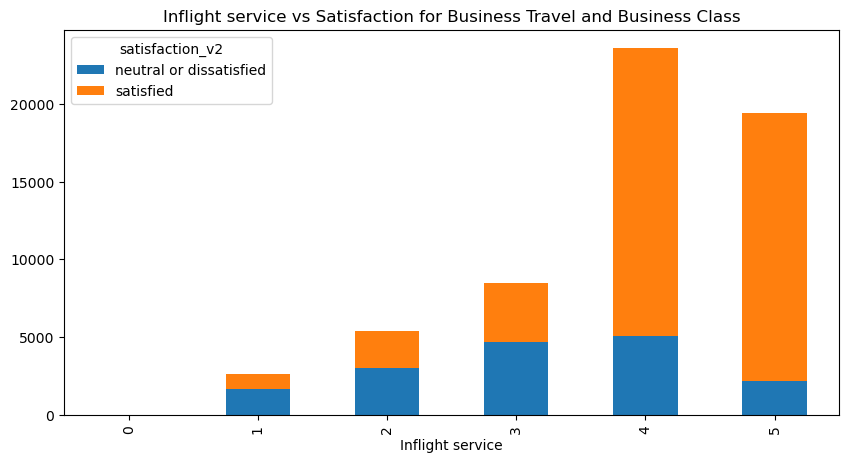

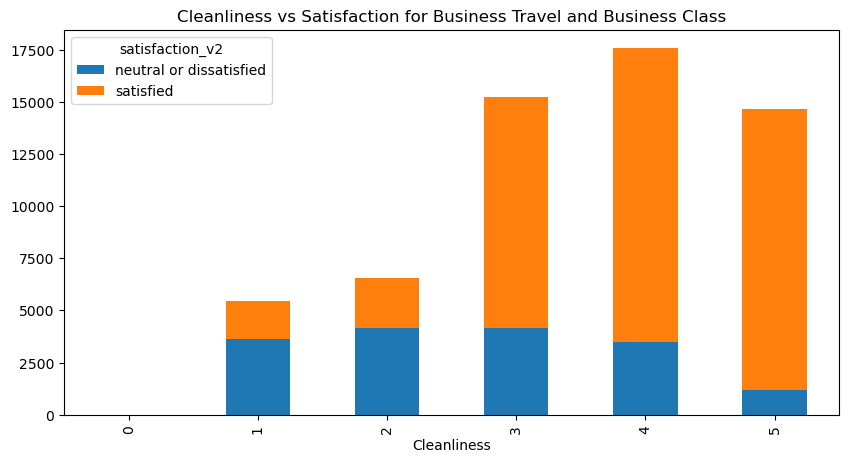

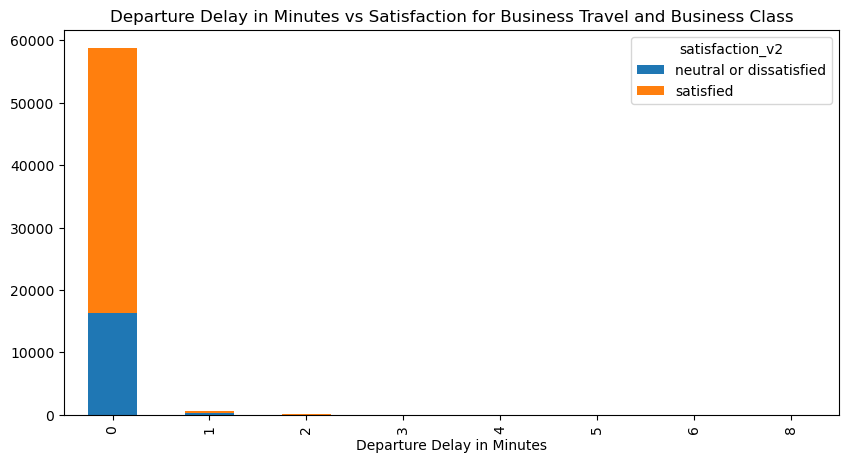

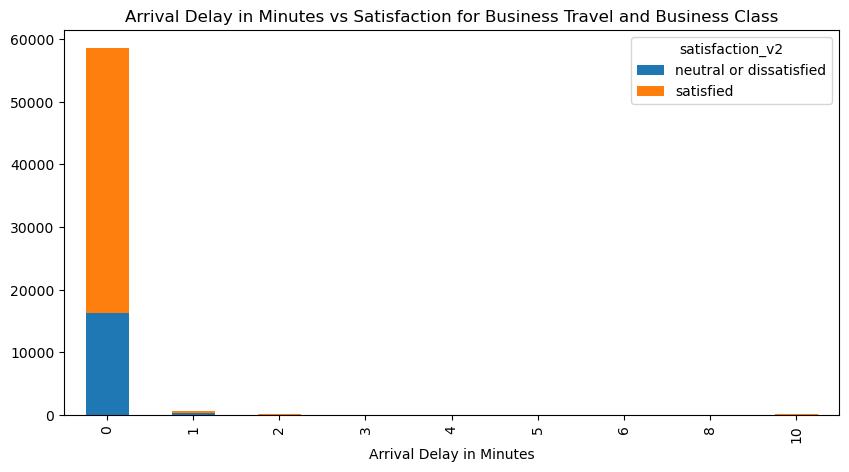

In [ ]:
# Filter rows where 'Type of Travel' is 'Business' and 'Class' is 'Business'
print(f"Number of rows where 'Type of Travel' is 'Business' and 'Class' is 'Business': {filtered2_df.shape[0]}")
# Iterate over each column in the filtered DataFrame
for column in filtered2_df.columns:
    # Exclude 'Type of Travel' and 'Class' from the comparison
    if column not in ['Type of Travel', 'Class']:
        # Create cross-tabulation between the current column and 'satisfaction_v2'
        cross_tab = pd.crosstab(filtered2_df[column], filtered2_df['satisfaction_v2'])

        # Create a stacked bar plot
        cross_tab.plot(kind='bar', stacked=True, figsize=(10, 5))
        plt.title(f"{column} vs Satisfaction for Business Travel and Business Class")
        plt.show()

The business class and business travel group has a larger sentiment of satisfaction than dissatisfaction. In each category, there are more satisfied customers than not. Now, let's move on to the third group: business travelers in the Eco/Eco Plus class.

Number of rows where 'Type of Travel' is 'Business' and 'Class' is 'Eco' & 'Eco Plus': 30206


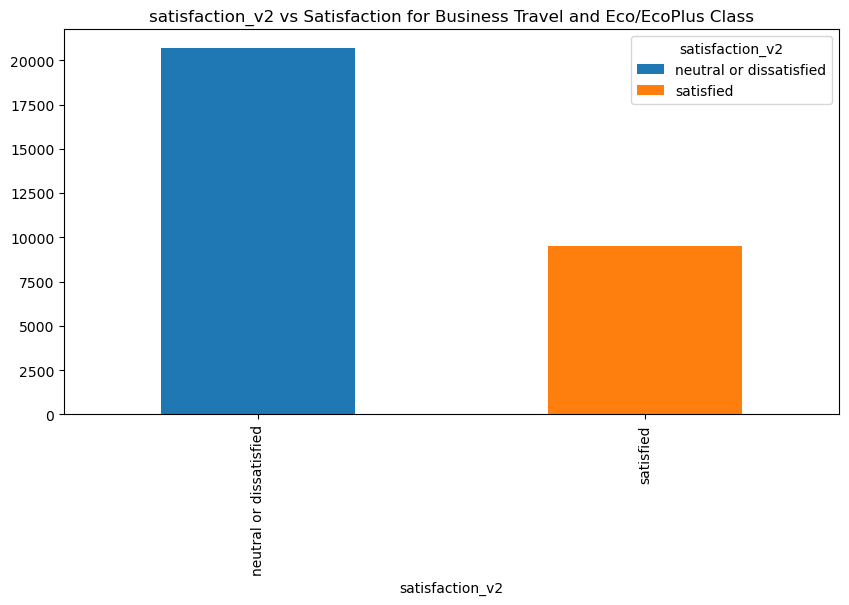

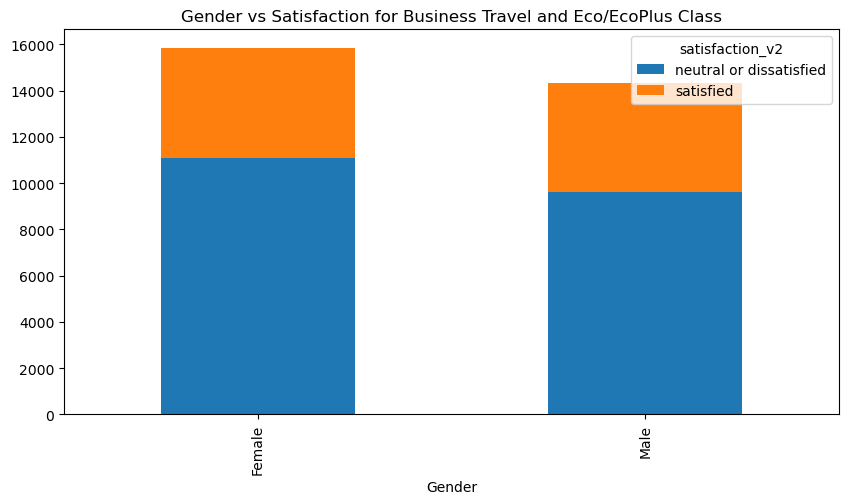

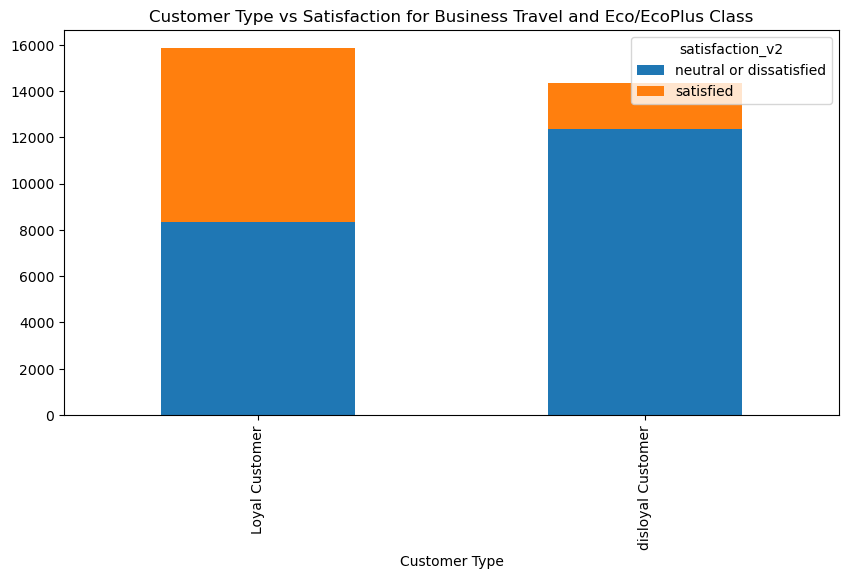

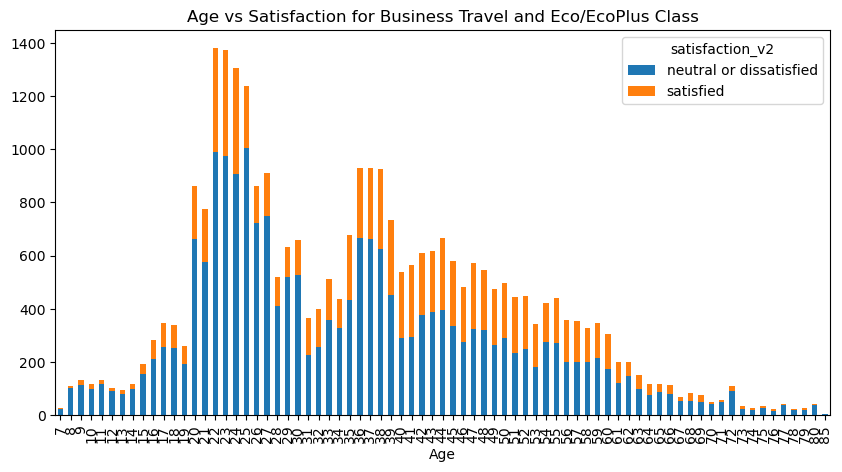

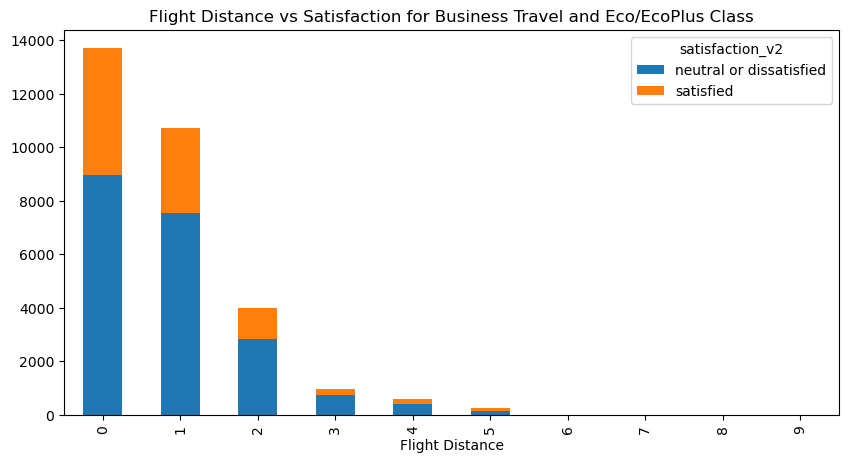

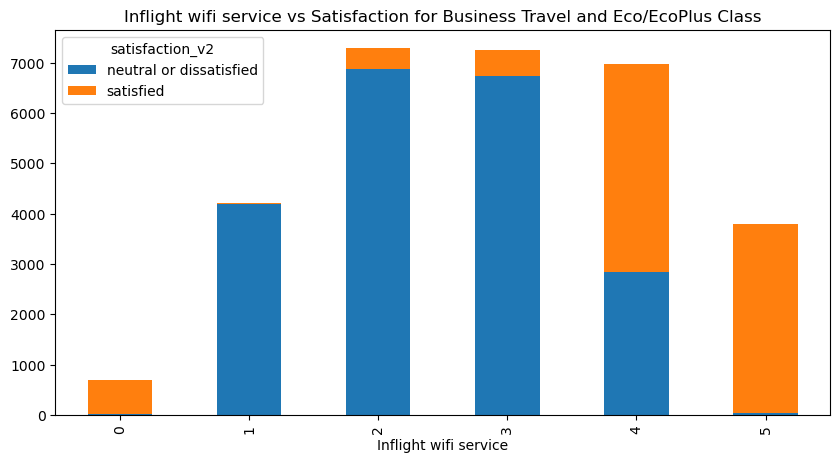

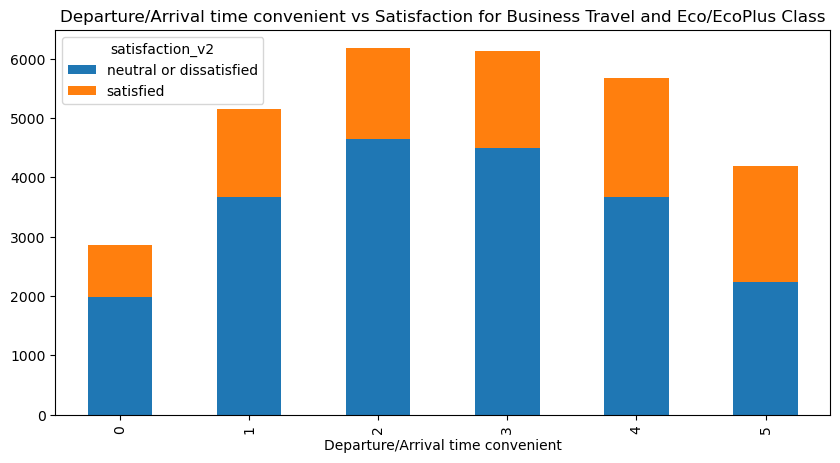

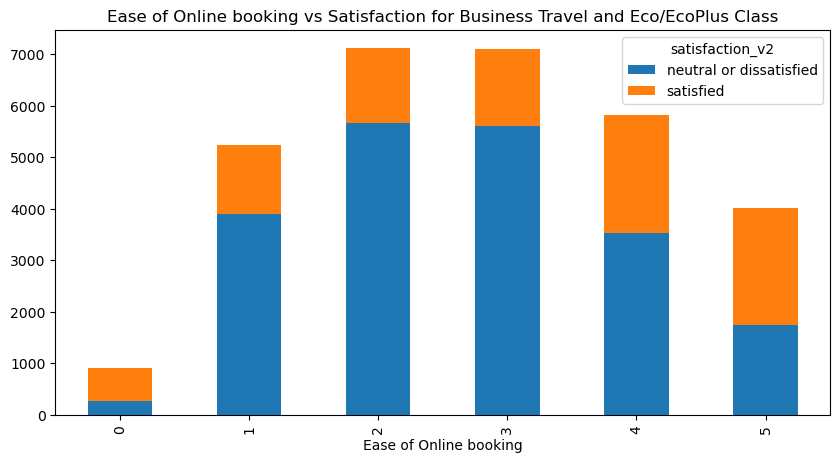

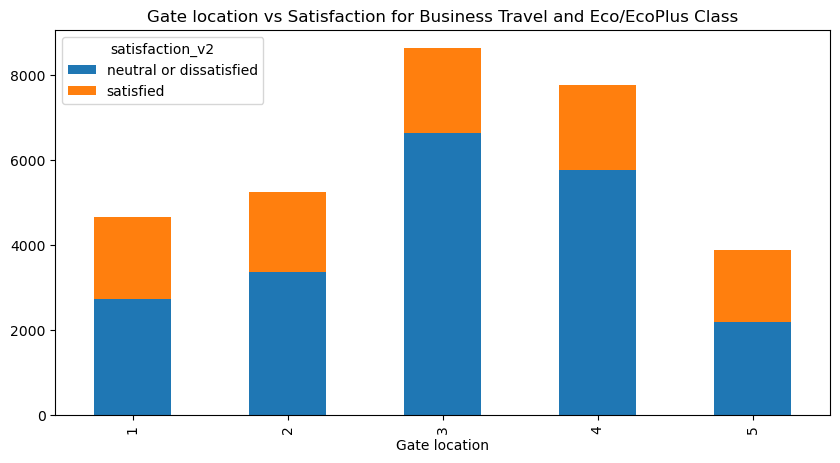

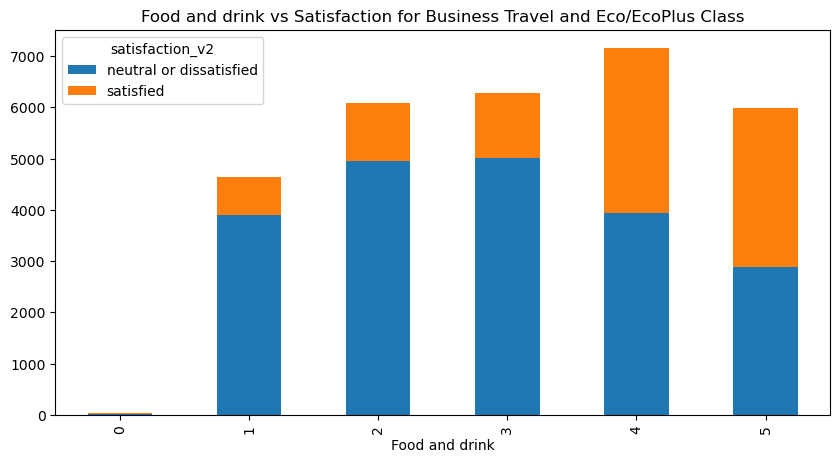

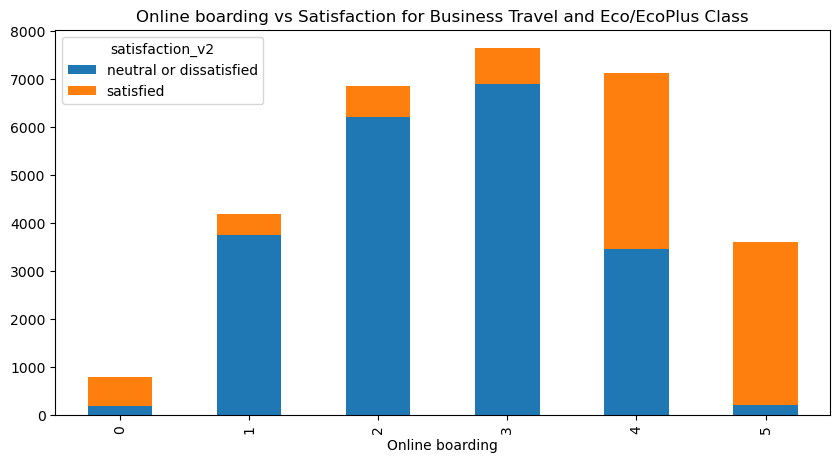

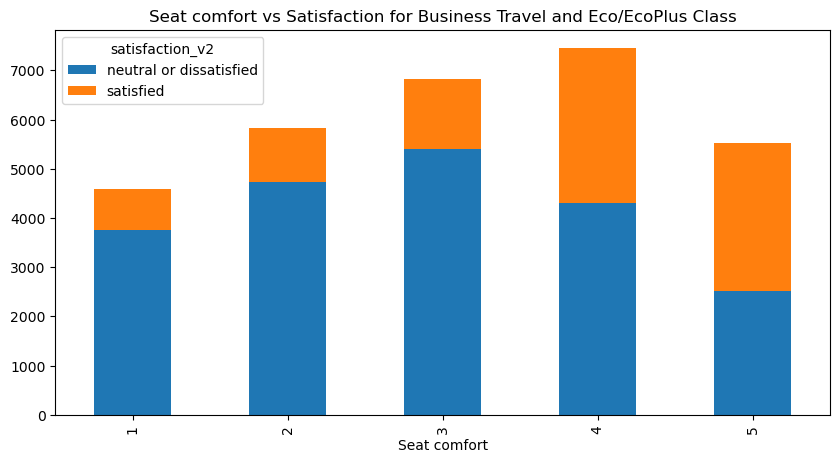

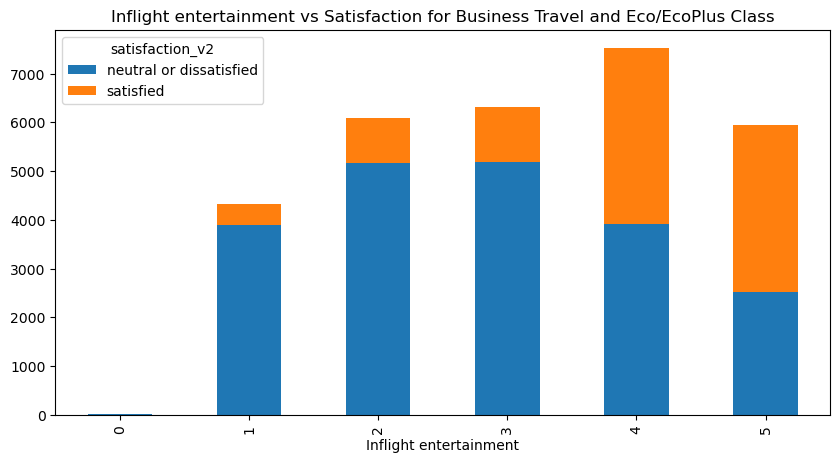

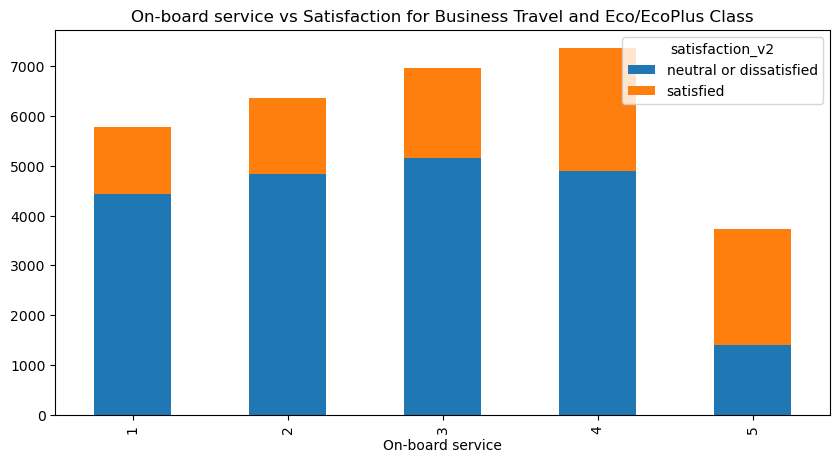

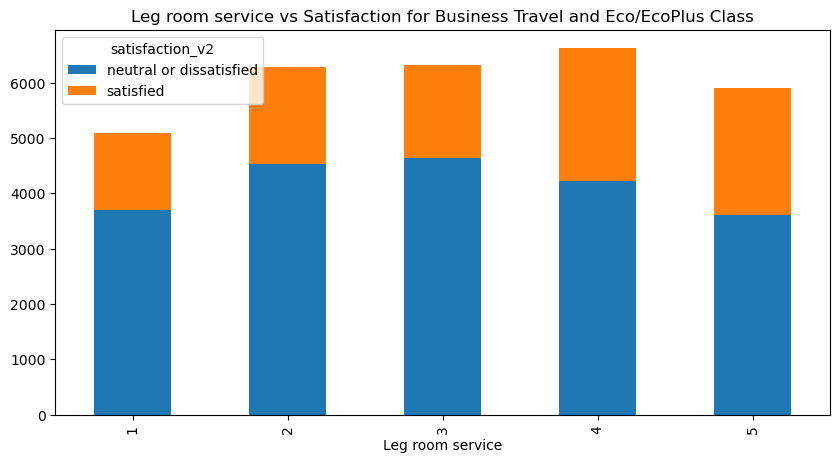

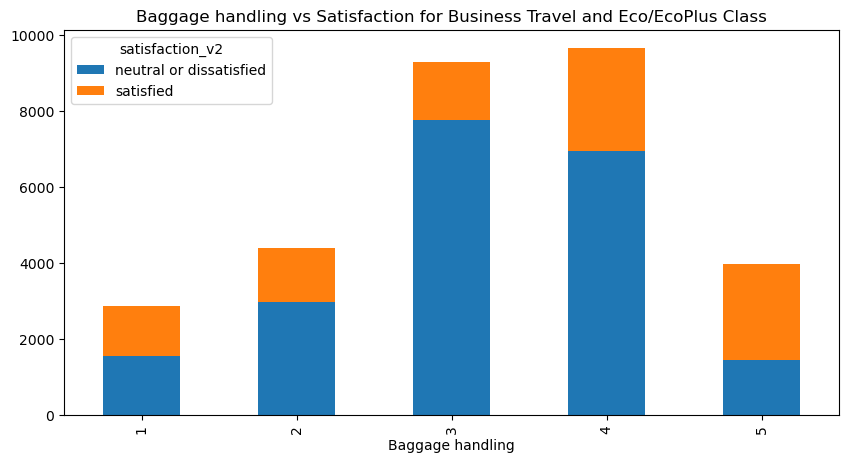

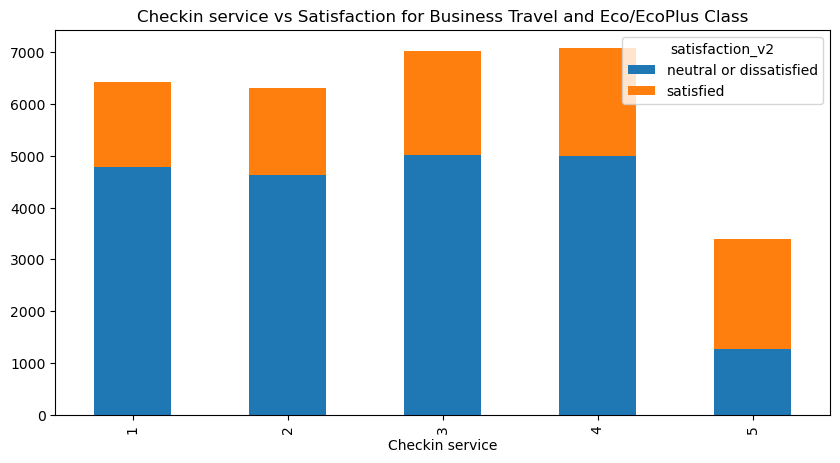

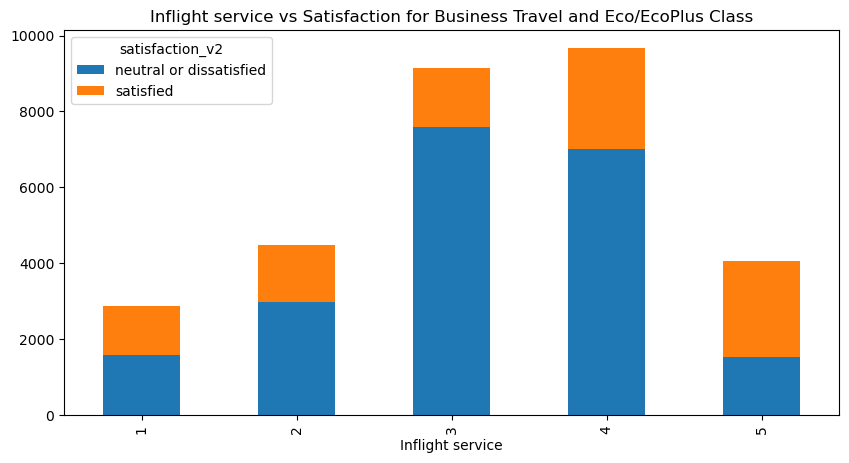

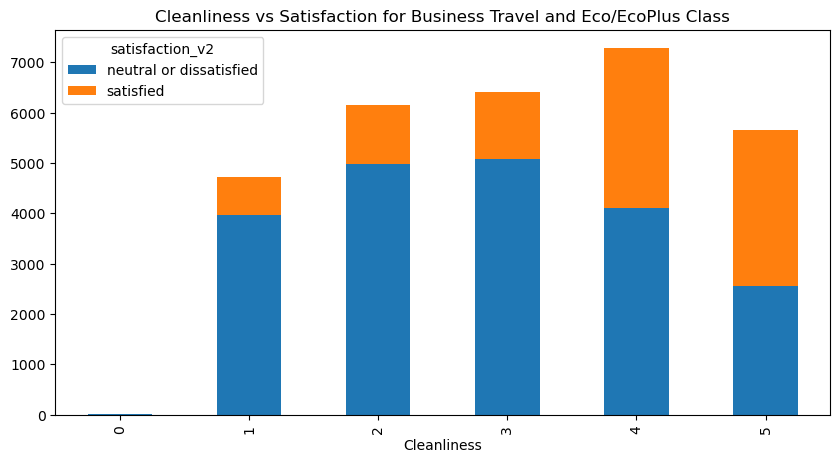

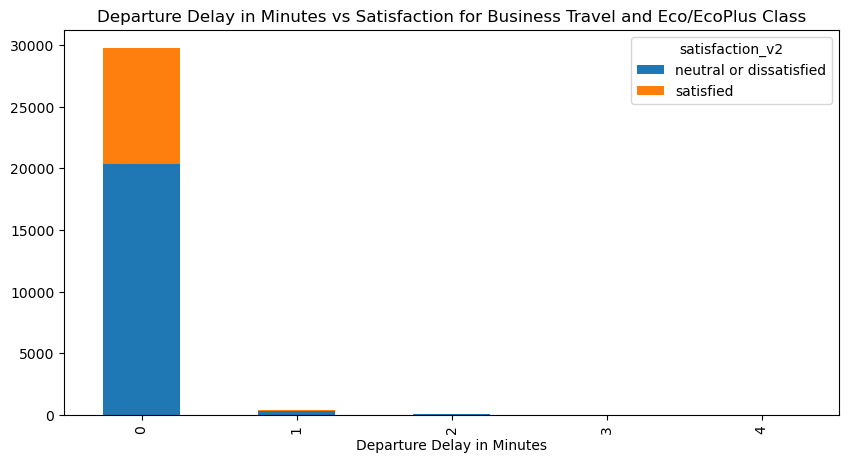

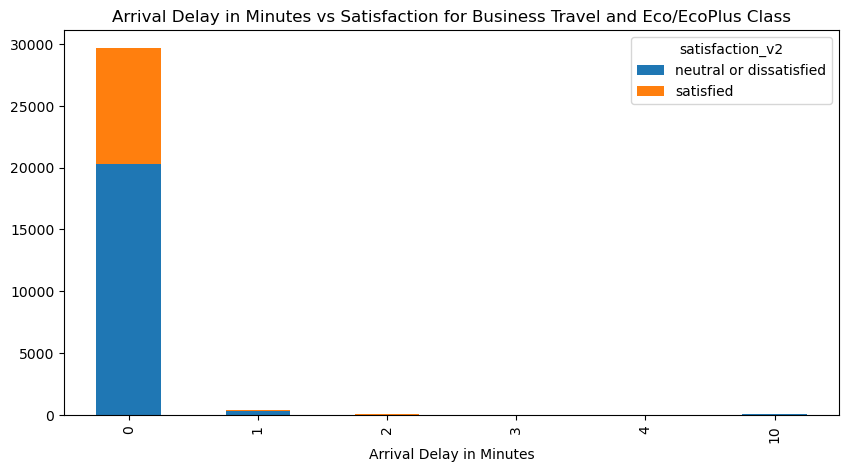

In [ ]:
# Filter rows where 'Type of Travel' is 'Business' and 'Class' is 'Eco' & 'Eco Plus'
filtered_df = df_original[(df['Type of Travel'] == 0) & (df['Class'].isin([1,2]))]
print(f"Number of rows where 'Type of Travel' is 'Business' and 'Class' is 'Eco' & 'Eco Plus': {filtered_df.shape[0]}")
# Iterate over each column in the filtered DataFrame
for column in filtered_df.columns:
    # Exclude 'Type of Travel' and 'Class' from the comparison
    if column not in ['Type of Travel', 'Class']:
        # Create cross-tabulation between the current column and 'satisfaction_v2'
        cross_tab = pd.crosstab(filtered_df[column], filtered_df['satisfaction_v2'])

        # Create a stacked bar plot
        cross_tab.plot(kind='bar', stacked=True, figsize=(10, 5))
        plt.title(f"{column} vs Satisfaction for Business Travel and Eco/EcoPlus Class")
        plt.show()

The business traveling customers in the Eco and Eco Plus classes exhibit the same sentiment as the first group, displaying an overwhelming amount of dissatisfaction regardless of the category being considered. Last group to view is the Personal Travel Business Class group.

Number of rows where 'Type of Travel' is 'Personal' and 'Class' is 'Business': 2673


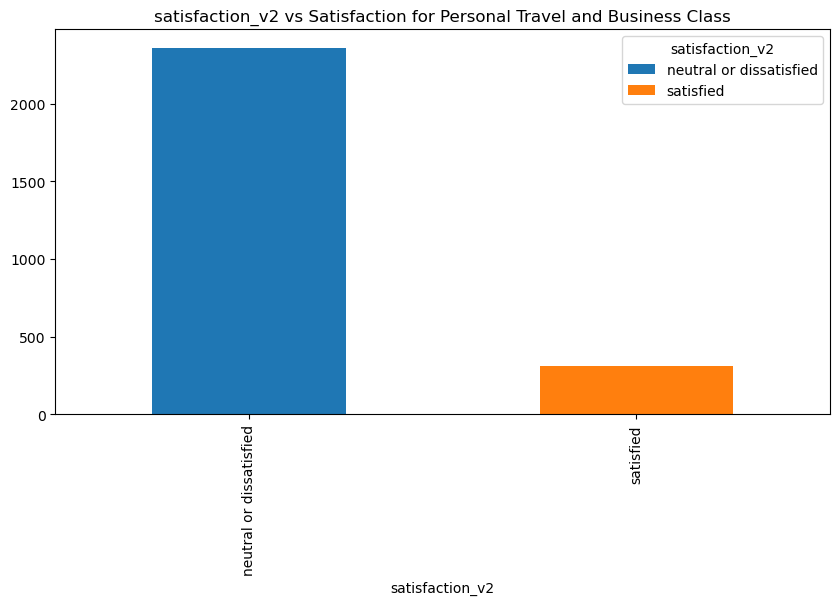

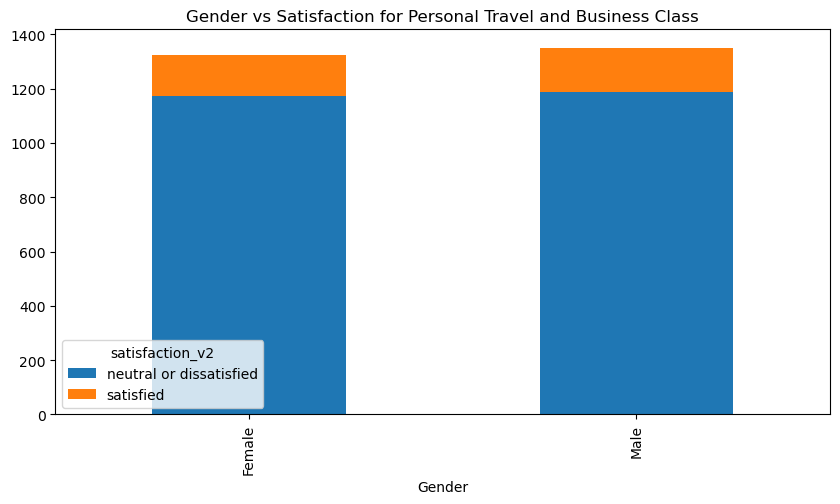

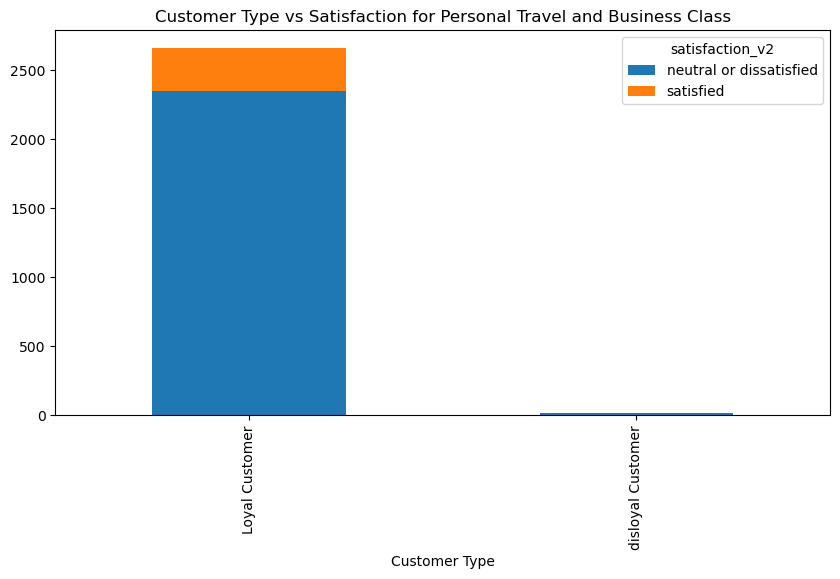

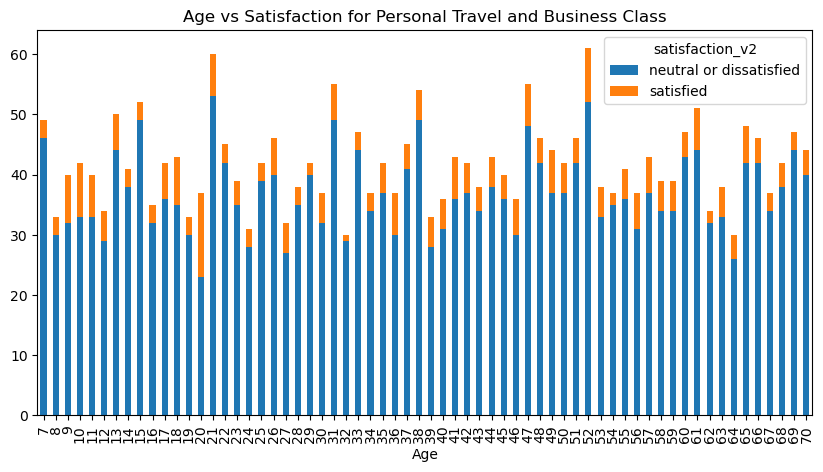

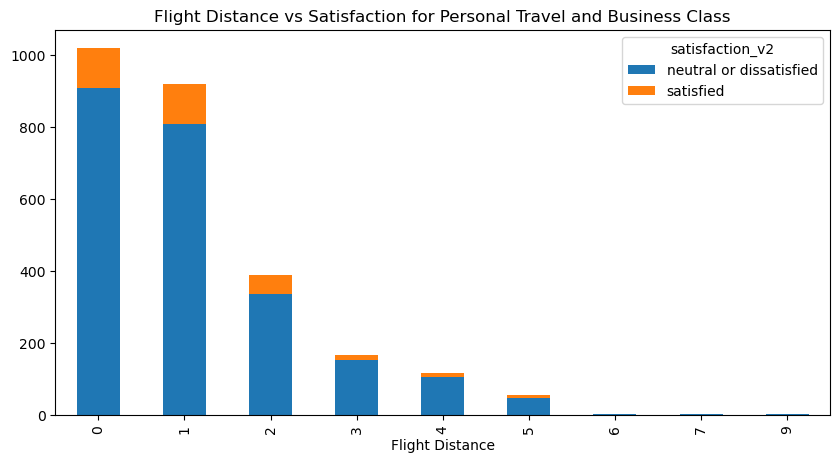

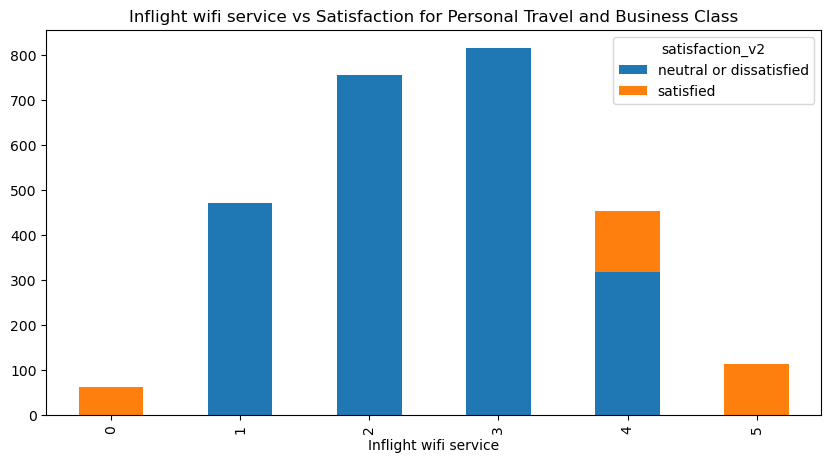

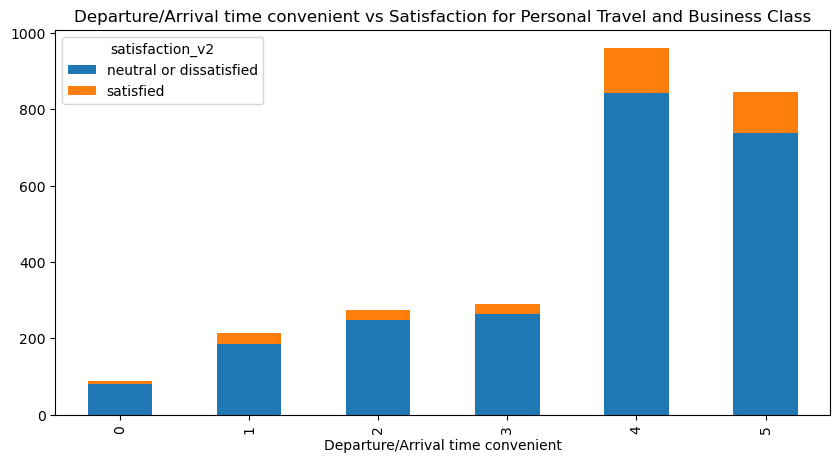

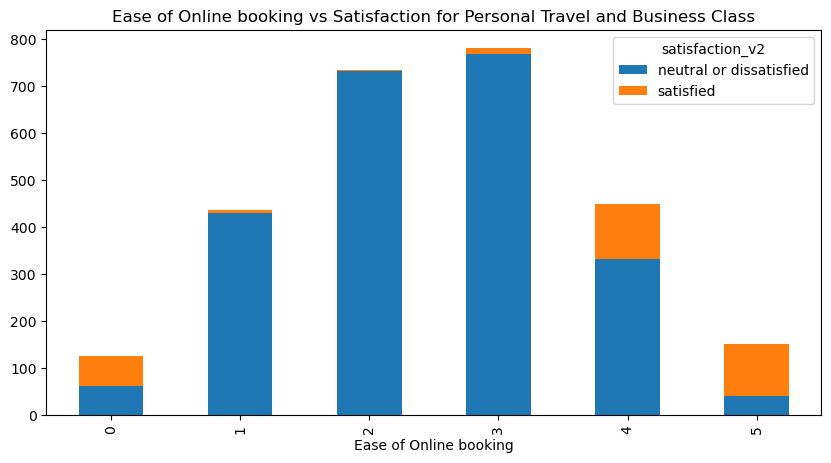

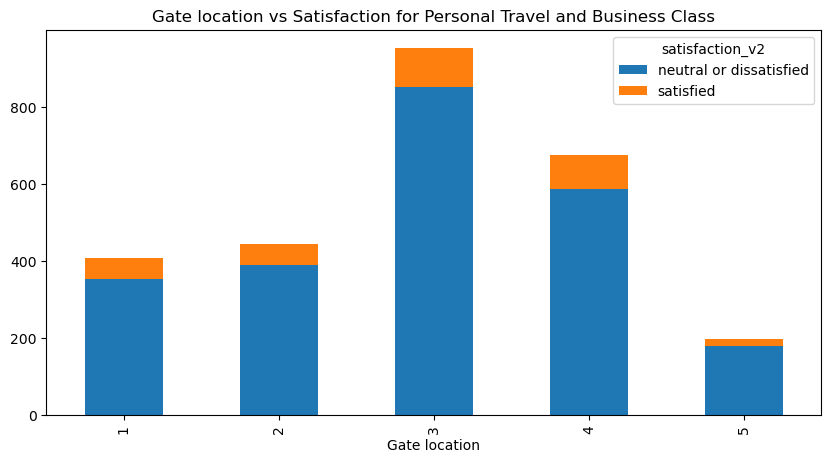

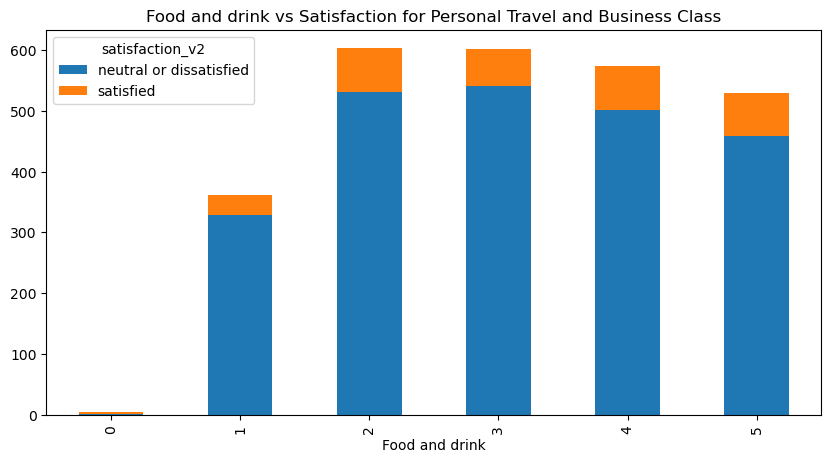

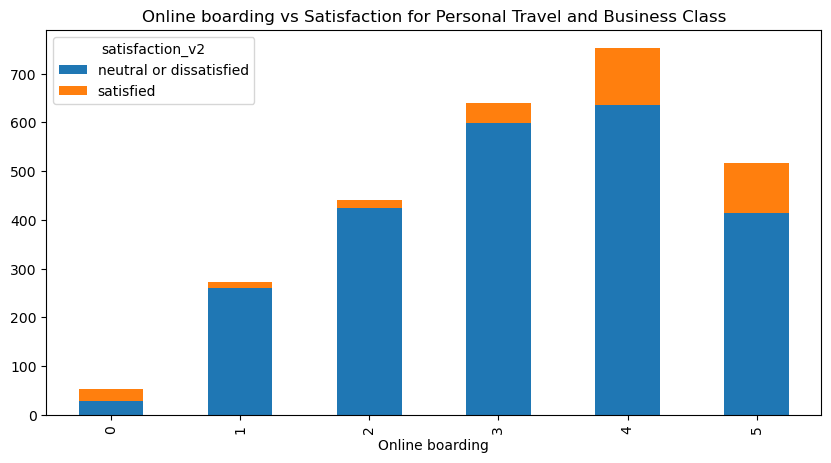

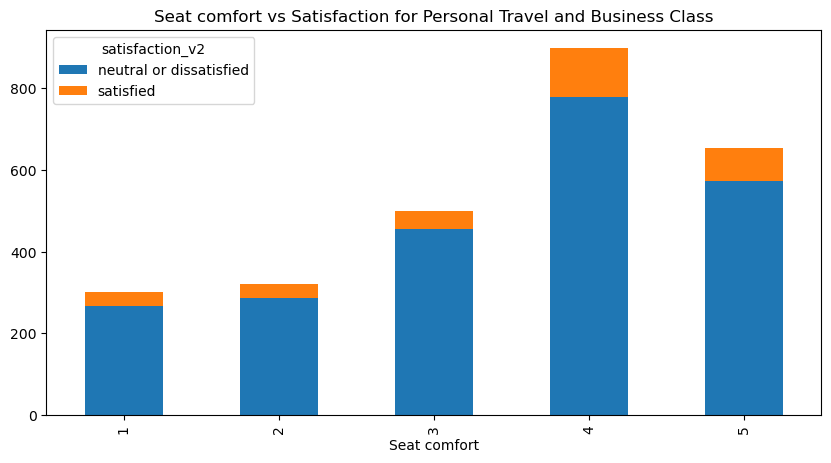

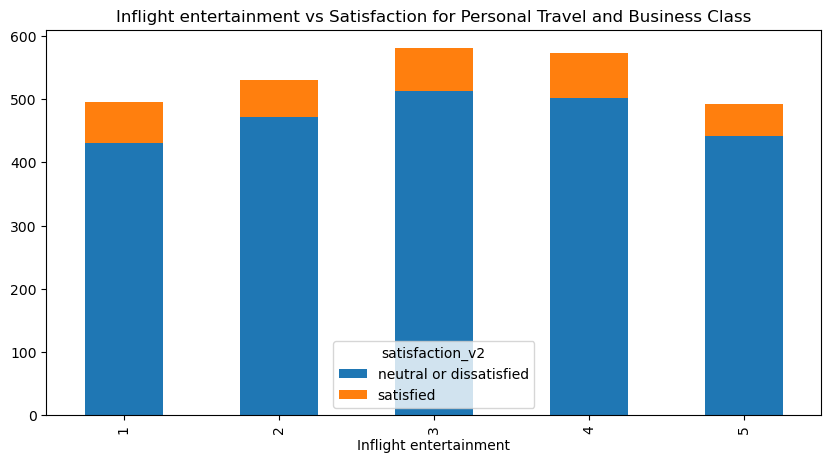

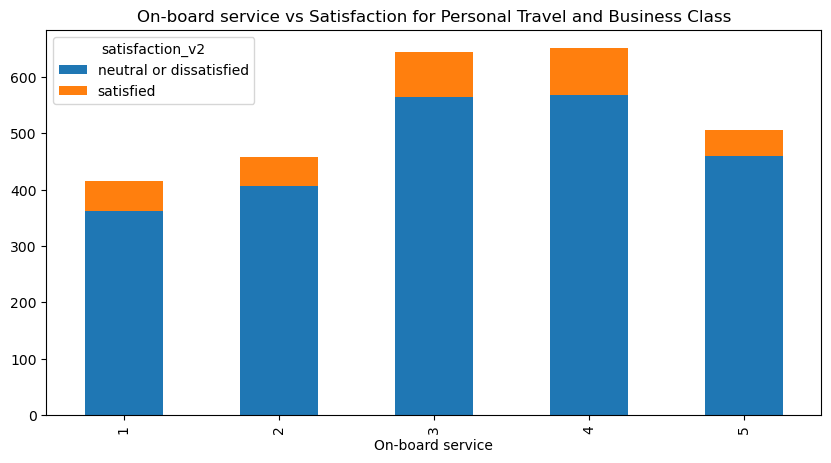

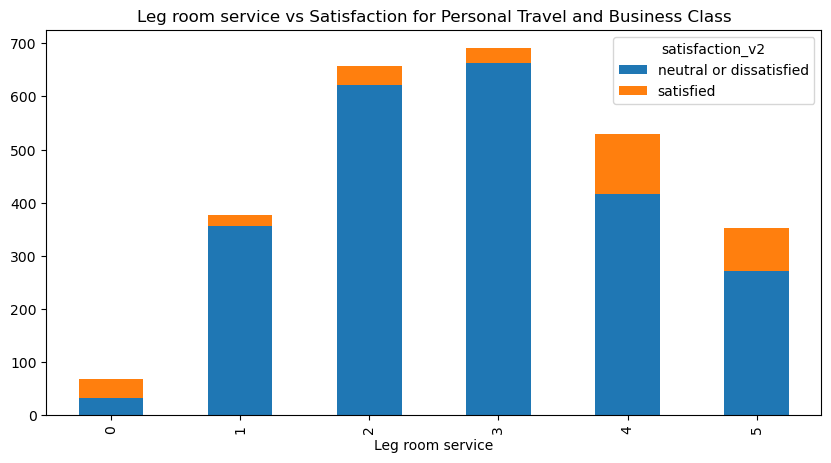

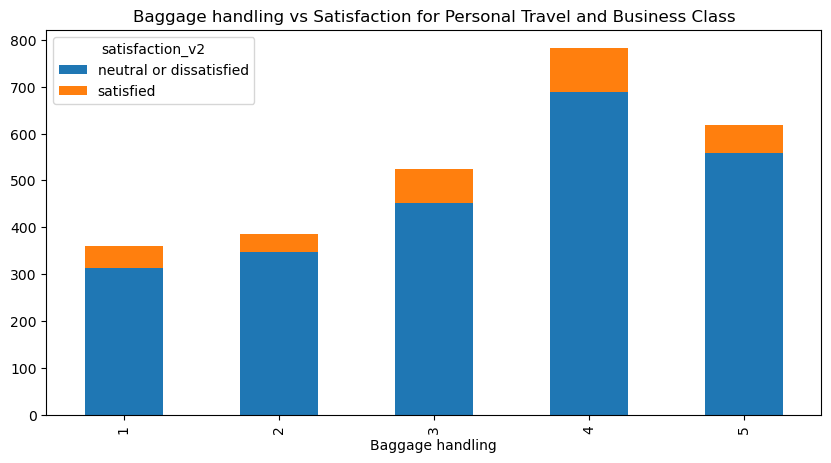

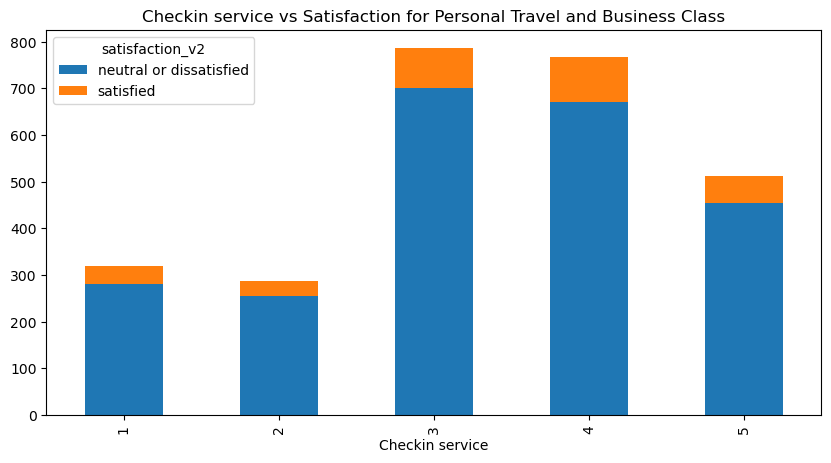

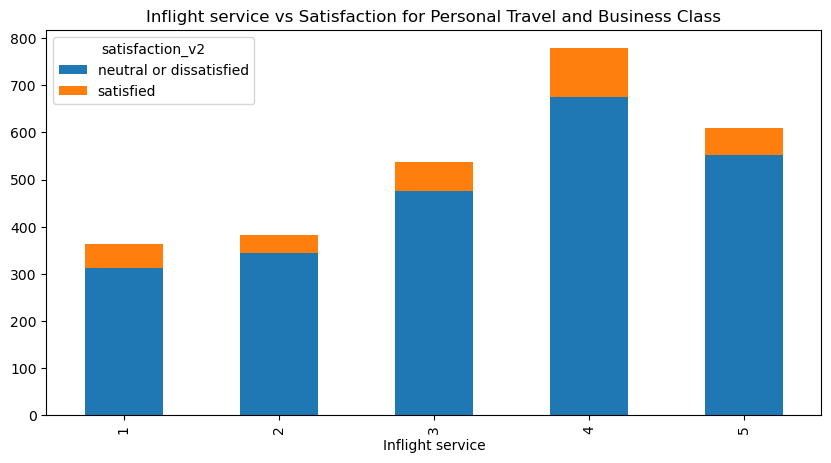

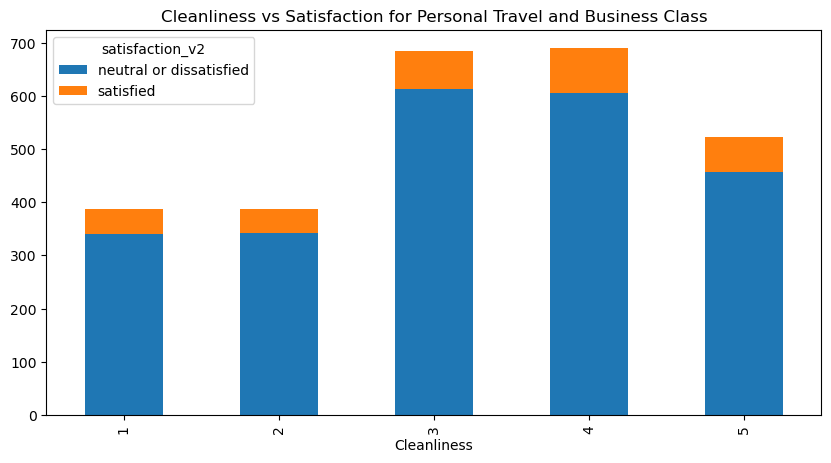

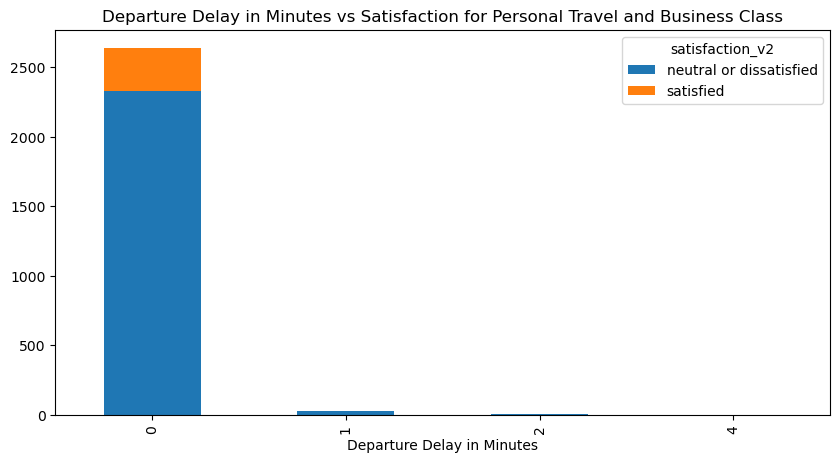

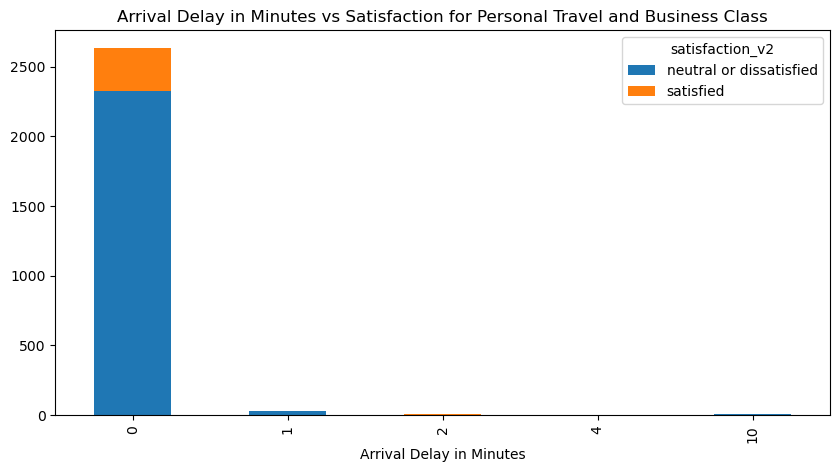

In [ ]:
# Filter rows where 'Type of Travel' is 'Business' and 'Class' is 'Eco' or 'Eco Plus'
print(f"Number of rows where 'Type of Travel' is 'Personal' and 'Class' is 'Business': {filtered4_df.shape[0]}")
# Iterate over each column in the filtered DataFrame
for column in filtered4_df.columns:
    # Exclude 'Type of Travel' and 'Class' from the comparison
    if column not in ['Type of Travel', 'Class']:
        # Create cross-tabulation between the current column and 'satisfaction_v2'
        cross_tab = pd.crosstab(filtered4_df[column], filtered4_df['satisfaction_v2'])

        # Create a stacked bar plot
        cross_tab.plot(kind='bar', stacked=True, figsize=(10, 5))
        plt.title(f"{column} vs Satisfaction for Personal Travel and Business Class")
        plt.show()

A significant dissatisfaction within personal travelers in business class shares the same qualities as the first and third groups. There is no clear outlier in the dissatisfaction among the three dissatisfied groups. Now, let's calculate the percentages of each category and visualize the Satisfied vs Dissatisfied distribution in a simple pie chart form.


Scenario 1: 'Type of Travel' is 'Personal' and 'Class' is in ['Eco', 'Eco Plus']

Total counts: 37514

Counts:
Dissatisfied    33755
Satisfied        3759

Percentages:
Dissatisfied    89.979741
Satisfied       10.020259


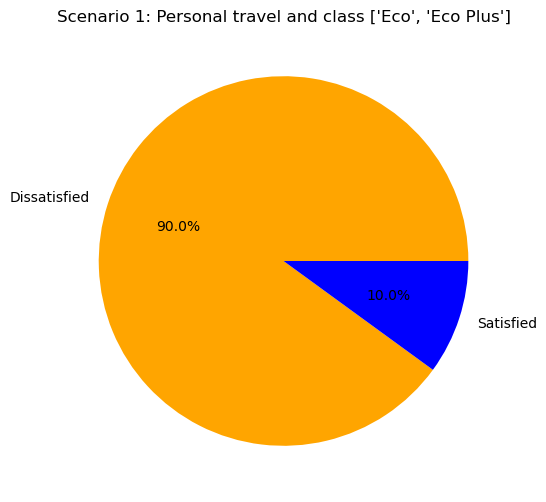


Scenario 2: 'Type of Travel' is 'Business' and 'Class' is in ['Business']

Total counts: 59487

Counts:
Satisfied       42853
Dissatisfied    16634

Percentages:
Satisfied       72.037588
Dissatisfied    27.962412


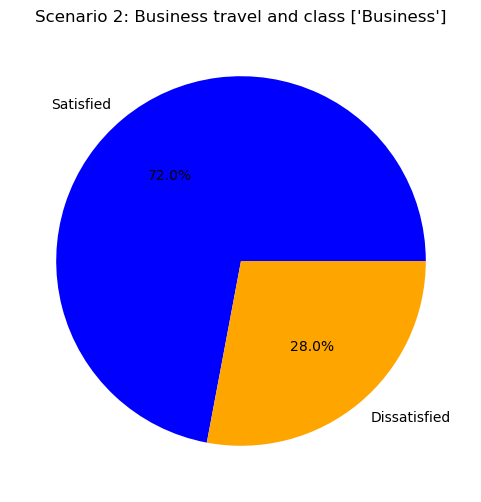


Scenario 3: 'Type of Travel' is 'Business' and 'Class' is in ['Eco', 'Eco Plus']

Total counts: 30206

Counts:
Dissatisfied    20703
Satisfied        9503

Percentages:
Dissatisfied    68.539363
Satisfied       31.460637


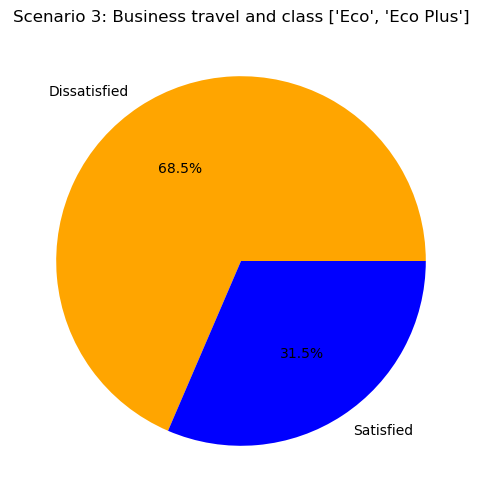


Scenario 4: 'Type of Travel' is 'Personal' and 'Class' is in ['Business']

Total counts: 2673

Counts:
Dissatisfied    2360
Satisfied        313

Percentages:
Dissatisfied    88.290311
Satisfied       11.709689


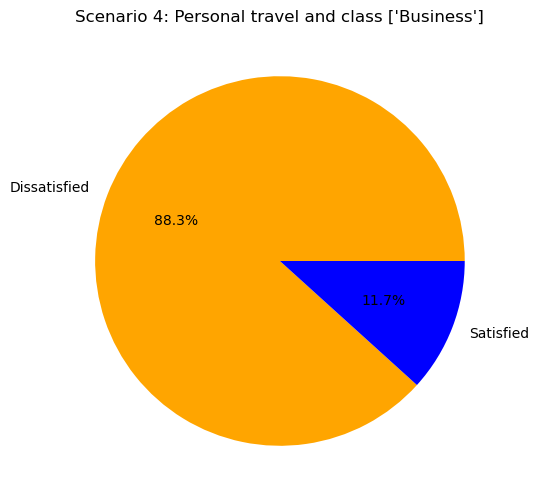

In [ ]:
# Define the scenarios
scenarios = [
    {'Type of Travel': 1, 'Class': [1, 2]},  # Personal, Eco/Eco Plus
    {'Type of Travel': 0, 'Class': [0]},     # Business, Business
    {'Type of Travel': 0, 'Class': [1, 2]},  # Business, Eco/Eco Plus
    {'Type of Travel': 1, 'Class': [0]}      # Personal, Business
]

# Define mapping dictionaries
travel_type_dict = {1: 'Personal', 0: 'Business'}
class_dict = {1: 'Eco', 2: 'Eco Plus', 0: 'Business'}
satisfaction_dict = {1: 'Satisfied', 0: 'Dissatisfied'}
color_dict = {'Satisfied': 'blue', 'Dissatisfied': 'orange'}  # Define a color dictionary

# For each scenario, filter the DataFrame, calculate the percentages and counts, and create a pie chart
for i, scenario in enumerate(scenarios, 1):
    # Filter the DataFrame
    filtered_df = df[(df['Type of Travel'] == scenario['Type of Travel']) & df['Class'].isin(scenario['Class'])]
    
    # Calculate the percentages and map to 'Satisfied' and 'Dissatisfied'
    percentages = filtered_df['satisfaction_v2'].value_counts(normalize=True).rename(satisfaction_dict) * 100
    
    # Calculate the counts and map to 'Satisfied' and 'Dissatisfied'
    counts = filtered_df['satisfaction_v2'].value_counts().rename(satisfaction_dict)
    
    # Print the counts and percentages
    print(f"\nScenario {i}: 'Type of Travel' is '{travel_type_dict[scenario['Type of Travel']]}' and 'Class' is in {[class_dict[i] for i in scenario['Class']]}")
    print(f"\nTotal counts: {counts.sum()}")
    print("\nCounts:")
    print("\n".join(str(counts).split("\n")[:-1]))  # Remove the last line (dtype) from the print
    print("\nPercentages:")
    print("\n".join(str(percentages).split("\n")[:-1]))  # Remove the last line (dtype) from the print
    
    # Create a pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', colors=[color_dict[key] for key in percentages.index])
    plt.title(f"Scenario {i}: {travel_type_dict[scenario['Type of Travel']]} travel and class {[class_dict[i] for i in scenario['Class']]}")
    plt.show()

As shown, when the type of travel is Personal or the class is Eco/Eco Plus, there is an overwhelming majority of dissatisfaction among the customers. We need to see if there's a clear way to seperate the two groups to identify the key factors influencing each. To investigate this further, we can use t-SNE (t-Distributed Stochastic Neighbor Embedding) to determine how easily the two Satisfaction values can be separated.

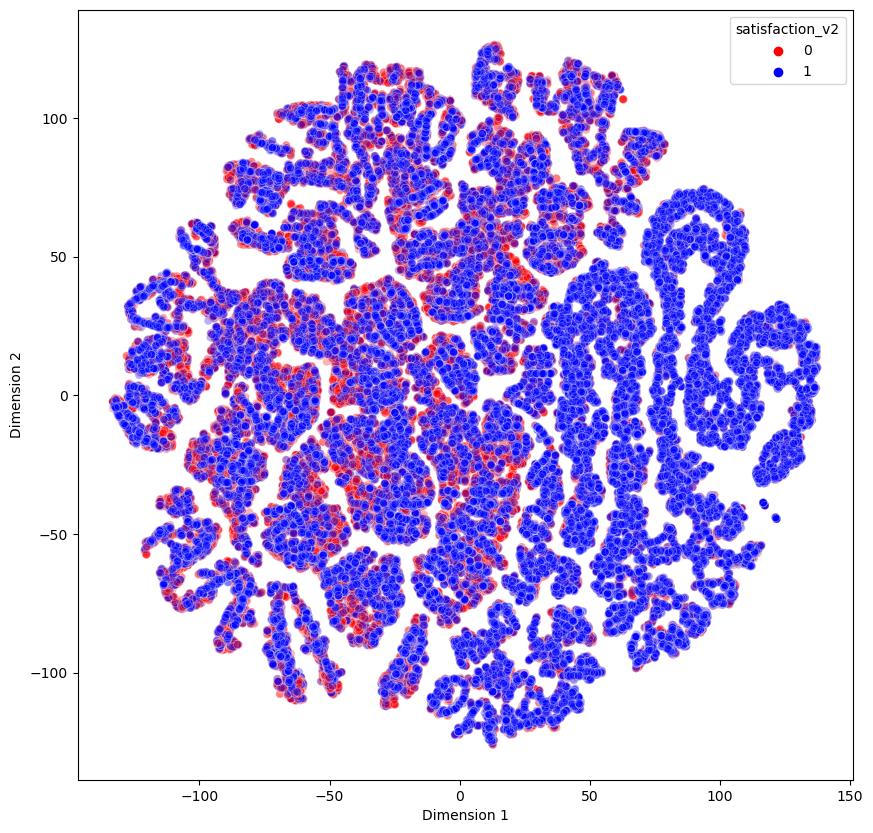

In [ ]:
from sklearn.manifold import TSNE
# Drop the target column and fit a TSNE model to the data
data = df.drop('satisfaction_v2', axis=1)
tsne = TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(data)

# Prepare the data for a seaborn scatterplot
tsne_df = pd.DataFrame(data=transformed_data, columns=['Dimension 1', 'Dimension 2'])
tsne_df = pd.concat([tsne_df, df['satisfaction_v2']], axis=1)

# Create the scatterplot, with coloring based on 'satisfaction_v2'
plt.figure(figsize=(10,10))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='satisfaction_v2', 
                palette=['red', 'blue'], data=tsne_df, legend="full", alpha=0.3)

plt.show()

Since t-SNE demonstrates that you cannot easily separate Satisfaction [1] from Dissatisfaction [0], the best strategy moving forward is to directly employ binary classification models. There is no point in trying PCA (Principal Component Analysis) because it does not provide a clear separation that allows for the easy distinction of the two satisfaction values.

Next, train and evaluate Binary Classifiers using cross-validation:
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)
- k-Nearest Neighbors (k-NN)
- Neural Network
- XGBoost
- LightGBM

After identifying the best-performing classifier, it will be trained on the full training set and evaluate its performance on the test set. This will provide an estimate of how well the selected model is likely to perform on new, unseen data and lead to better insights into customer satisfaction levels.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Split the dataset into training and testing sets
X = df.drop('satisfaction_v2', axis=1)
y = df['satisfaction_v2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Create classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier()
}

# Train and evaluate classifiers using cross-validation
best_mean_accuracy = 0
best_standard_deviation = 0
best_classifier = None
best_classifier_name = None
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(cv_scores)
    standard_deviation = np.std(cv_scores)
    if mean_accuracy > best_mean_accuracy:
        best_classifier = clf
        best_classifier_name = name
        best_mean_accuracy = mean_accuracy
        best_standard_deviation = standard_deviation
    print(f'{name} - Mean accuracy: {mean_accuracy:.4f}, Std: {standard_deviation:.4f}')

# Train the best performing classifier on the full training set and evaluate on the test set
best_classifier.fit(X_train, y_train)
y_pred = best_classifier.predict(X_test)

print(f'\nBest classifier: {best_classifier_name}')
print(f'Test accuracy: {accuracy_score(y_test, y_pred):.4f}')


Logistic Regression - Mean accuracy: 0.8746, Std: 0.0016
Decision Tree - Mean accuracy: 0.9451, Std: 0.0012
Random Forest - Mean accuracy: 0.9621, Std: 0.0003
Support Vector Machine - Mean accuracy: 0.9542, Std: 0.0011
k-Nearest Neighbors - Mean accuracy: 0.9285, Std: 0.0024
Neural Network - Mean accuracy: 0.9575, Std: 0.0022
XGBoost - Mean accuracy: 0.9630, Std: 0.0009
LightGBM - Mean accuracy: 0.9638, Std: 0.0013

Best classifier: LightGBM
Test accuracy: 0.9632


The best classifier is LightGBM with an accuracy of 96.32%. Next, we will find the optimal threshold that results in the highest F1-score by exploring various threshold values to determine which value maximizes the F1-score. This will be used to obtain a list of the top 10 features that contribute the most to customer dissatisfaction according to the LightGBM classification model. This information can provide valuable insights and help identify areas to target for improvements in customer satisfaction.


Best Classifier: LightGBM - Test Set Performance:
Accuracy: 0.9632352941176471
Confusion Matrix:
 [[14333   315]
 [  640 10688]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14648
           1       0.97      0.94      0.96     11328

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Optimal threshold using F1 score: 0.52
                  features  importances
6    Inflight wifi service          530
2                      Age          249
1            Customer Type          209
3           Type of Travel          176
11         Online boarding          174
16        Baggage handling          165
4                    Class          161
12            Seat comfort          156
13  Inflight entertainment          150
18        Inflight service          147


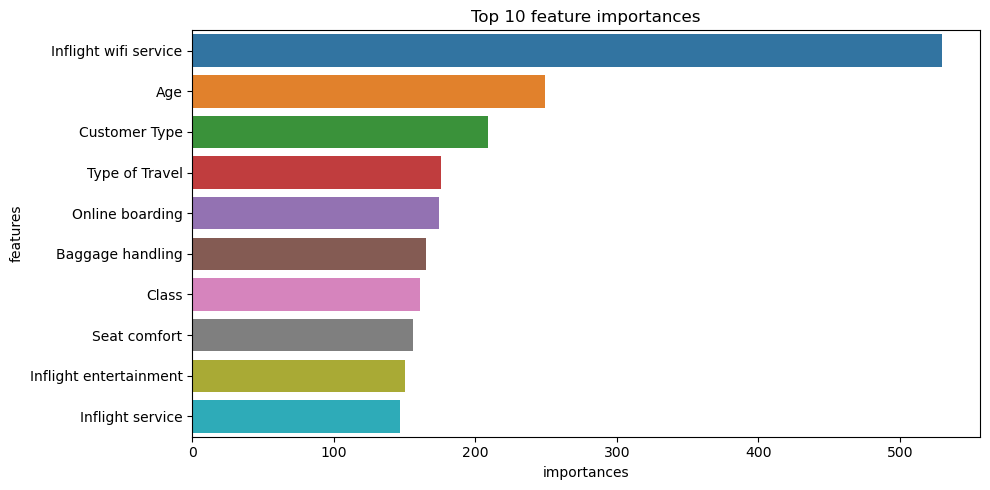

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb
from sklearn.metrics import f1_score

# Print evaluation metrics
print(f'Best Classifier: {best_classifier_name} - Test Set Performance:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Define LightGBM model
model = lgb.LGBMClassifier()

# Fit model
model.fit(X_train, y_train)

# Get predicted probabilities
y_pred_probs = model.predict_proba(X_test)[:, 1]

# Initialize a list to store F1 scores
f1_scores = []

# Iterate through a range of possible threshold values and calculate the F1 score for each
thresholds = np.arange(0, 1.01, 0.01)
for threshold in thresholds:
    y_pred = (y_pred_probs > threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Find the optimal threshold with the highest F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]
print("Optimal threshold using F1 score:", optimal_threshold)

# Get feature importances from the LightGBM model
importances = model.feature_importances_

# Create a DataFrame for visualization
importances_df = pd.DataFrame({'features': X_train.columns, 'importances': importances})

# Sort by importances
importances_df = importances_df.sort_values('importances', ascending=False)

# Display the top 10 features and their importances
top_10_features = importances_df.head(10)
print(top_10_features)

# Plot feature importances
plt.figure(figsize=(10,5))
sns.barplot(x='importances', y='features', data=top_10_features)
plt.title('Top 10 feature importances')
plt.tight_layout()
plt.show()

The results indicate that the optimal threshold for separating customer satisfaction levels using the F1-score is 0.52. The model provides the best balance between precision and recall at this threshold and has an accuracy of 96.32%

The top 10 features (sorted by their importances) are:
- 1) Inflight wifi service (importance: 530) - Customers highly value the availability and quality of inflight wifi service.
- 2) Age (importance: 249) - Customer satisfaction may vary depending on their age group; different age groups might have different preferences and expectations.
- 3) Customer Type (importance: 209) - Whether the customer is a loyal or a new customer shows a significant difference in satisfaction levels.
- 4) Type of Travel (importance: 176) - The purpose of travel (business or personal) plays a role in determining customers' satisfaction.
- 5) Online boarding (importance: 174) - Efficiency and ease of online boarding process impact customers' satisfaction.
- 6) Baggage handling (importance: 165) - Proper handling of customers' luggage and ensuring its prompt and safe delivery influences satisfaction.
- 7) Class (importance: 161) - The class in which customers are traveling (Eco, Eco Plus, Business) affects their satisfaction levels.
- 8) Seat comfort (importance: 156) - The comfort of the airplane seats is a significant factor in overall customer satisfaction.
- 9) Inflight entertainment (importance: 150) - The variety and quality of the inflight entertainment options offered are essential to customers.
- 10) Inflight service (importance: 147) - Attentiveness, professionalism, and friendliness of the flight crew contribute to customer satisfaction.

These results show that inflight wifi service is the most important factor contributing to customer dissatisfaction, while other factors like age, customer type, and the type of travel also play a role. Improving these aspects can help increase the overall satisfaction of customers.

# Part 3


---


Now we will use our model to predict which customers are most likely to be satisfied and organized these predictions, along with some key information about each customer, in a clear and easy-to-understand format.

In [ ]:
# Predict the probabilities using the best model (LightGBM in this case)
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Create a DataFrame from the predicted probabilities
predicted_probabilities_df = pd.DataFrame(predicted_probabilities, columns=['predicted_probability'])

# Extract the original values of the top 10 features from the X_test
top_features_df = df2[top_10_features.features]

# Concatenate the ID from df2, predicted probabilities, and top 10 features
df_final = pd.concat([df2['id'], predicted_probabilities_df, top_features_df], axis=1)

# Sort the customers based on the predicted probability (descending order)
df_final = df_final.sort_values(by='predicted_probability', ascending=False)

# Display the DataFrame
print(df_final.head())

          id  predicted_probability  Inflight wifi service  Age  \
17031  15739               0.999941                      2   48   
23839   7539               0.999931                      3   69   
8980   38172               0.999928                      2   70   
12593  96669               0.999925                      2   53   
11961  63931               0.999923                      2   20   

        Customer Type   Type of Travel  Online boarding  Baggage handling  \
17031  Loyal Customer  Personal Travel                2                 3   
23839  Loyal Customer  Personal Travel                4                 2   
8980   Loyal Customer  Personal Travel                4                 5   
12593  Loyal Customer  Personal Travel                2                 5   
11961  Loyal Customer  Personal Travel                2                 4   

      Class  Seat comfort  Inflight entertainment  Inflight service  
17031   Eco             3                       3               

We first used our best performing prediction model (LightGBM in this case) to assess the likelihood that each customer in our test data set is satisfied. This model, which was trained on data, produces a "predicted probability" for each customer. This value, a number between 0 and 1, represents the model's best estimate of the chance that a given customer is satisfied.

We then put these predicted probabilities into a DataFrame, giving us a clear and organized way to view this data.

In addition to the predicted probabilities, we are also interested in certain key features about each customer that our model found to be the most influential in predicting customer satisfaction. We already determined which 10 features were most important earlier on, so we extracted the specific details related to these top 10 features for each customer in our test data set.

With the customer IDs, predicted probabilities, and the top 10 features all prepared, we combined all these elements into one comprehensive table, making it easier to analyze all the important data together.

Since we want to focus on those customers that our model thinks are most likely to be satisfied, we sorted this table so that the customers with the highest predicted probabilities are at the top.

Finally, we printed out the top few rows of this table, allowing us to see the customers that our model has identified as the most likely to be satisfied along with their relevant details.